# Projeto de Diagnóstico de Doenças da Glândula Tireoide

## Objetivo do Projeto

<p>As doenças da Tireoide representam um desafio relevante para a saúde pública, pois afetam diretamente o corpo humano e podem trazer graves consequências, como alterações neurológicas, metabólicas, reprodutivas e até mesmo risco de câncer. A detecção precoce dessas alterações hormonais é fundamental para evitar complicações e garantir que o  ratamento, seja iniciado de forma mais eficaz, com melhores resultados clínicos.</p>

<p>O objetivo deste projeto foi desenvolver uma ferramenta de apoio à tomada de decisão médica, utilizando técnicas de Aprendizado de Máquina para analisar dados e aumentar a precisão diagnóstica. Foram aplicadas estratégias como redução de dimensionalidade e otimização de hiperparâmetros, resultando em um modelo capaz de contribuir para diagnósticos mais confiáveis.</p>

<p>O trabalho também enfrentou restrições, como o tamanho limitado e o conjunto de dados desbalanceado, além da necessidade de interpretar os resultados com cautela para evitar conclusões precipitadas em um contexto clínico. Ainda assim, a abordagem proposta pode reduzir custos, melhorar a qualidade de vida dos pacientes e fortalecer estratégias de prevenção, tornando-se um recurso valioso tanto para profissionais da área quanto para o bem-estar da população.</p>

> #### **AVISOS!**
>- *Este projeto tem a utilidade apenas de informar sobre a existência de >alterações da gândula Tireoide, não havendo a intenção de diagnosticar precisamente o tipo de doença! A variável alvo em questão (binaryClass), classifica se há (Positivo) ou não há (Negativo) presença de alguma doença. A investigação mais profunda e diagnóstico final sobre a doença do paciente em questão, deve ser realizada pelo profissional. Os possíveis diagnósticos são: **Hipertireoidismo, Hipotireoidismo, Bócio, Nódulos/Tumores e condições associadas.**
>- Os valores dos resultados dos exames são fictícios, não atendendo aos níveis normais e alterados dos moldes de exames clínicos reais, porém, possuem padrões próprios para identificação das doenças abordadas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, recall_score, precision_score)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from xgboost import XGBClassifier
import plotly.express as px

## Coleta de Dados
- Os dados da base foram disponibilizados na plataforma [Kaggle](https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set/data). São dados públicos disponibilizados por <b>Ross Quinlan</b> e são voltados principalmente para aprendizado de máquina e outras aplicações. O site da base original encontra-se [aqui](https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease).


In [2]:
df = pd.read_csv("Base_doenca_tireoide.csv", delimiter = ',')
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df.head(10).to_string())
print(df.tail(10).to_string())

  age sex on thyroxine query on thyroxine on antithyroid medication sick pregnant thyroid surgery I131 treatment query hypothyroid query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured   TSH T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG referral source binaryClass
0  41   F            f                  f                         f    f        f               f              f                 f                  f       f      f     f             f     f            t   1.3           t  2.5            t  125            t  1.14            t  109            f   ?            SVHC           P
1  23   F            f                  f                         f    f        f               f              f                 f                  f       f      f     f             f     f            t   4.1           t    2            t  102            f     ?            f    ?            f   ?           other           P
2  46   M          

## Dados da base
<p>Abaixo, a lista inicial dos dados disponibilizados serão
apresentados para melhor entendimento e contextualização ao longo do projeto:<p>

1. **SEX:** Sexo do paciente (categórico)*;
2. **AGE:** Idade do paciente (numérico);
3. **ON THYROXINE:** Se há indicador de uso de hormônio tireoidiano (levotiroxina) (binário)*;
4. **QUERY ON THYROXINE:** Se há dúvida ou suspeita sobre uso de hormônio tireoidiano (binário);
5. **ON ANTITHYROID MEDICATION:** Se há uso de medicamentos
para reduzir a função da Tireoide (ex.: metimazol) (binário);
6. **SICK:** Se apresenta algum sintoma clínico de doença (binário);
7. **PREGNANT:** Se a paciente está grávida (binário);
8. **THYROID SURGERY:** Se há histórico de cirurgia na glândula Tireoide (binário);
9. **I131 TREATMENT:** Se realizou tratamento com radioiodo (Iodo radioativo). Usado principalmente para tratar câncer da Tireoide (binário);
10. **QUERY HYPOTHYROID:** se há suspeita de hipotireoidismo (binário);
11. **QUERY HYPERTHYROID:** se há suspeita de hipertireoidismo (binário);
12. **LITHIUM:** Se houve uso de lítio. Geralmente utilizado para tratamento de bipolaridade (binário);
13. **GOITRE:** Se há presença de bócio (aumento da glândula) (binário);
14. **TUMOR:** Se há presença de tumor ou nódulo na Tireoide (binário);
15. **HYPOPITUITARY:** Se há presença de hipopituitarismo (deficiência da hipófise que afeta hormônios gerados pela glândula) (binário);
16. **PSYCH:** se há histórico de distúrbios psiquiátricos (binário);
17. **TSH MEASURED:** indica se o exame de TSH foi realizado (binário);
18. **TSH:** Níveis do hormônio estimulante da glândula no sangue (numérico);
19. **T3 MEASURED:** indica se o exame de T3 foi realizado (binário);
20. **T3:** Níveis do hormônio triiodotironina no sangue (numérico);
21. **TT4 MEASURED:** indica se o exame de TT4 foi realizado (binário);
22. **TT4:** Valor da tiroxina total no sangue (numérico);
23. **T4U MEASURED:** indica se o exame de T4U foi realizado (binário);
24. **T4U:** Níveis de tiroxina livre presentes no sangue (numérico);
25. **FTI MEASURED:** indica se FTI foi calculado (binário);
26. **FTI:** Índice de tiroxina livre no sangue, calculados a partir de TT4 e T4U (numérico);
27. **TBG MEASURED:** indica se TBG foi medida (binário);
28. **TBG:** Níveis da globulina ligadora de tiroxina presente no sangue(numérico);
29. **REFERRAL SOURCE:** Qual a origem do encaminhamento do paciente (hospital, clínica, outro) (categórico);
30. **BINARYCLASS:** Variável alvo, indica se há ou não doença da Tireoide (binário)*.

> **DICIONÁRIO:**
>
> - *Dados **Categóricos**: variáveis textuais. No contexto desta base, a categorização dos pacientes são feitas com siglas, como *referral source* e *sex*.
> - *Dados **Binários**: variáveis verdadeiras ou falsas indicados nessa base por T/F. Apesar de categóricas, se comportam como binárias.
>> - *A única exceção se encontra na variável binaryClass onde os dados binários são indicados como Positivo e Negativo (P/N).

## Tratamento dos dados

In [3]:
# Verificando tipos dos dados
print('\nTipo de Dados: \n',df.dtypes)

# Verificando escrita dos dados por coluna
val_unico = {col: df[col].unique() for col in df.columns}
for col, val in val_unico.items():
    print(f'Coluna: {col}')
    print(f'Valores presentes: {val}\n')

# Tratar as colunas baseado em seu contexto:
print(df[df['hypopituitary']=='t'].to_string())

# Exclusão de linhas que não agregam na análise
df.drop(columns = ['TBG measured', 'TBG', 'hypopituitary'], inplace = True)

# Dados de 'sex'
sexo = df['sex'].value_counts()
# transformando '?' em F para pacientes Grávidas antes da alteração em massa
df.loc[(df['sex'] == '?') & (df['pregnant'] == 't'), 'sex'] = 'F'
print(((df['sex'] == '?') & (df['pregnant'] == 't')).value_counts())
print('\nPorcentagem de cada: \n', (sexo/sexo.sum()) * 100)

# Selecionando apenas '?' e calculando distribuição proporcional
rest = df[df['sex'] == '?'].index
f = len(rest)
n_fem, n_masc = int(f*0.6574), int(f*0.3027) # Imputando valores de maneira randomizada
ind_random = np.random.permutation(rest)
df.loc[ind_random[:n_fem], 'sex'] = 'F'
df.loc[ind_random[n_fem:n_fem+n_masc], 'sex'] = 'M'
df.loc[ind_random[n_fem+n_masc:], 'sex'] = 'F' # Manter o restante ao grupo mais prevalente
print(df['sex'].unique()) # Validação dos valores únicos alterados

# Usando getdummies para evitar enviesar a base
df = pd.get_dummies(df, columns = ['sex'], prefix = 'sex', drop_first = False)
print(df.head().to_string())
# Usando get_dummies para a var referral source
df = pd.get_dummies(df, columns = ['referral source'], prefix = 'referral source', drop_first = False)
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

# Em age substituir '?' (nulo) por média das idades registradas e alterando dados incorretos
df['age'] = pd.to_numeric(df['age'].replace('?', pd.NA), errors = 'coerce')
df['age'] = df['age'].replace(455, 45)
df['age'] = df['age'].fillna(df['age'].mean()).astype(int)

# Verificando situação de dados de exames igualados a '?'
print(((df['T4U measured'] == 'f') & (df['T4U'] != '?')).value_counts())
print(((df['FTI measured'] == 't') & (df['FTI'] == '?')).value_counts())

# Colunas binarias em forma categórica serão convertidas em binárias em forma de inteiro
binaria_cols = [col for col in df.columns if df[col].isin(['f', 't']).all()]
df[binaria_cols] = df[binaria_cols].replace({'f': 0, 't': 1}).astype(int)

# Filtra apenas as que contêm o caracter '?'
for col in df.select_dtypes(include = 'object'):
    if df[col].str.contains(r'\?').any():
        df[col] = pd.to_numeric(df[col].replace('?', 0), errors = 'coerce')

# Mudando binaryClass, variável target
df['binaryClass'] = df['binaryClass'].map({'P': 1, 'N': 0})
print(df['binaryClass'].unique())

# Validando alteração da tipagem dos dados
print('\nTipo de Dados: \n', df.dtypes)

# Verificando possibilidade de outliers
print(df.describe())

faixas_TSH = {
    'TSH = 0': (df['TSH'] == 0),
    '0 < TSH <= 2.2': (df['TSH'] > 0) & (df['TSH'] <= 2.42),
    '2.2 < TSH <= 10': (df['TSH'] > 2.42) & (df['TSH'] <= 10),
    '10 < TSH <= 50': (df['TSH'] > 10) & (df['TSH'] <= 50),
    '50 < TSH <= 100':(df['TSH'] > 50) & (df['TSH'] <= 100),
    '100 < TSH':(df['TSH'] > 100)
}

faixas_T3 = {
    'T3 = 0': (df['T3'] == 0),
    '0 < T3 <= 1.8': (df['T3'] > 0) & (df['T3'] <= 1.8),
    '1.8 < T3 <= 2.2': (df['T3'] > 1.8) & (df['T3'] <= 2.2),
    '2.2 < T3 <= 5.0': (df['T3'] > 2.2) & (df['T3'] <= 5.0),
    '5.0 < T3':(df['T3'] > 5.0)
}

faixas_FTI = {
    'FTI = 0': (df['FTI'] == 0),
    '0 < FTI <= 86.75': (df['FTI'] > 0) & (df['FTI'] <= 86.75),
    '86.75 < FTI <= 104': (df['FTI'] > 86.75) & (df['FTI'] <= 104),
    '104 < FTI <= 121.25': (df['FTI'] > 104) & (df['FTI'] <= 121.25),
    '121.25 < FTI':(df['FTI'] > 121.25)
}

faixas_TT4 = {
    'TT4 = 0': (df['TT4'] == 0),
    '0 < TT4 <= 84': (df['TT4'] > 0) & (df['TT4'] <= 84),
    '84 < TT4 <= 102': (df['TT4'] > 84) & (df['TT4'] <= 102),
    '102 < TT4 <= 123': (df['TT4'] > 102) & (df['TT4'] <= 123),
    '123 < TT4':(df['TT4'] > 123)
}

# Loop para imprimir resultados
for nome, cond in faixas_TSH.items():
    subset = df[cond]
    total = len(subset)
    com_doenca = (subset['binaryClass'] == 1).sum()
    sem_doenca = (subset['binaryClass'] == 0).sum()

    print(f'{nome}:')
    print(f' Total de pacientes: {total}')
    print(f' Com Doença da Tireóide: {com_doenca}')
    print(f' Sem Doença da Tireóide: {sem_doenca}\n')
    print(subset.head(50).to_string())

# Alteração de valores acima e/ou abaixo do normal
df['TSH'] = df['TSH'].apply(lambda x: x / 10 if x >= 100 else x)
print(df[df['TSH'] >= 100].to_string())
df_ml = df.copy()


Tipo de Dados: 
 age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG       

/tmp/ipython-input-3655778508.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binaria_cols] = df[binaria_cols].replace({'f': 0, 't': 1}).astype(int)


[1 0]

Tipo de Dados: 
 age                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
binaryClass                    int64
sex_F                          int64
sex_M         

<p>Para que a base de dados seja utilizada na análise e posteriormente na etapa de aprendizagem dos modelos, os dados serão adaptados para valores numéricos e as devidas alterações na base serão realizadas de acordo com seu contexto.</p>

- Dados que não possuíam variedade de valores foram descartados pelos motivos abaixo:
    1. *TBG measured* e **TBG** serão excluídos por não ocorrerem realizações do exame em nenhum paciente, não há necessidade de realização deste exame para a detecção da doença em nenhum caso registrado.
    2. *Hypopituitary* ou Hipopituitarismo apresenta apenas um caso positivo dentre as mais de 3 mil linhas de registro de pacientes. Por mais que o diagnóstico de doenças da Tireoide deste caso seja positivo, não é possível levar tal dado com seriedade e considerá-lo relevante para o projeto em questão, visto que este representa apenas 0,026% do total de registros, não trazendo robustez e confiabilidade para diagnóstico.

<p>Foram encontrados poucos erros de digitação para correção. Além disso, dada a enorme quantidade de dados desconhecidos, estes foram ajustados como necessários, como descritos abaixo:</p>

- A variável *sex* possui quase 4% dos seus dados sem especificação F (Feminino) ou M (Masculino). Para evitar descarte dessa porcentagem de linhas, a determinação do sexo de cada paciente com dados ausentes será feita proporcional e aleatóriamente, visto que, quase 66% dos pacientes são mulheres e 30% são constituídos por homens. Antes, pacientes grávidas foram alterados manualmente para obrigatoriamente serem do sexo Feminino. Por fim, a variável foi separada em duas colunas a partir do get dummies, evitando viés e as transformando em binárias para melhor leitura na análise.
- Valores desconhecidos de idade dos pacientes em *age* foram substituídos pela média das idades registradas para manter a
consistência e evitar enviesamento dos dados. Os erros de  digitação das idades acima de 100 anos foram ajustadas.
- O método get_dummies também foi implementado na coluna *referral source* da mesma forma, evitando viés e para utilização nas análises posteriormente.

<p>Todos os dados referentes aos números de resultados de exame que indicam '?' se dão pela constatação F (Falso) da variável de realização do exame, ou seja, por constar que determinado exame não foi feito, não existe resultado, indicando assim o '?'. Portanto, para fins de análise, estes serão transformados em 0.</p>

<p>Os demais dados categóricos representados com Verdadeiro (T) e Falso (F) foram ajustados para se comportarem como binárias em valores inteiros, utilizando 1 e 0 para os respectivos valores. No mesmo padrão, a coluna de diagnóstico <em>binaryClass</em> com valores Positivo (P) e Negativo (N) foram estruturadas da mesma maneira com 1 e 0.</p>

<p>Por fim, após uma breve avaliação na função describe, foi possível observar possíveis outliers não captados inicialmente na etapa de tratamento. Poucos valores muito acima do normal em resultados de exames de TSH foram devidamente corrigidos para valores abaixo de 100. Os padrões do diagnóstico foram levados em consideração para a alteração desses dados.</p>

## Análise Exploratória dos Dados
### Análise Univariada
<p>Nesta sessão, serão postas análises das variáveis separadamente, expondo pontos relevantes sobre o impacto dos dados disponíveis. </p>

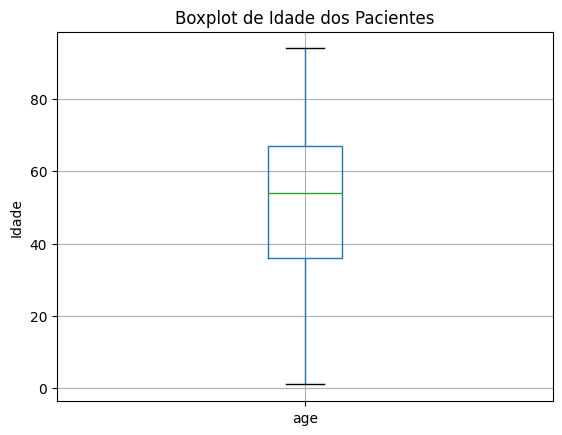

In [ ]:
# Boxplot da idade
df.boxplot(column = 'age')
plt.title('Boxplot de Idade dos Pacientes')
plt.ylabel('Idade')
plt.show()

#### **Boxplot de age**
<p>Geralmente, pacientes registrados para realização dos exames e recebimento do diagnóstico estão entre as idades de 36 e 67 anos, o que sugere que os problemas na Tireoide são mais propensos a aparecerem entre a fase adulta e no início da terceira idade.</p>


Porcentagem de cada:

binaryClass
Sim    92.29
Não     7.71
Name: proportion, dtype: float64


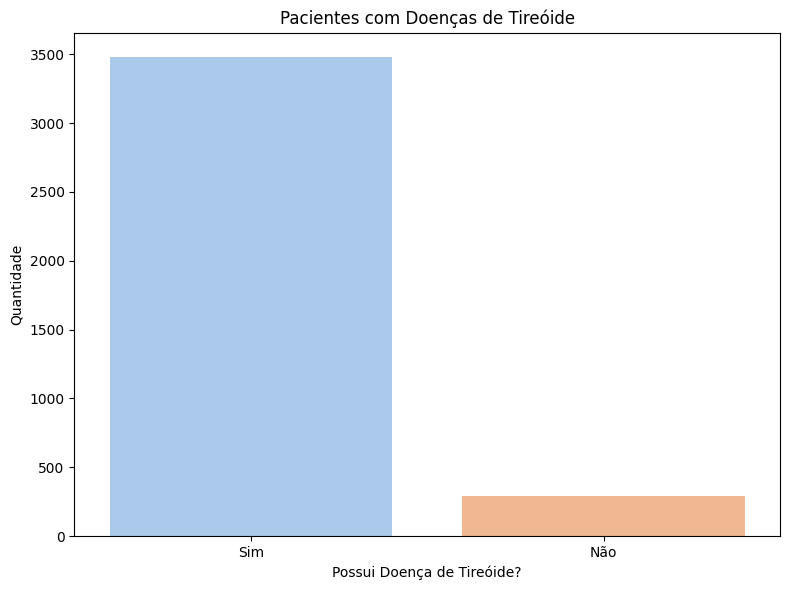


Porcentagem de cada:

query hypothyroid
Não    93.8
Sim     6.2
Name: proportion, dtype: float64


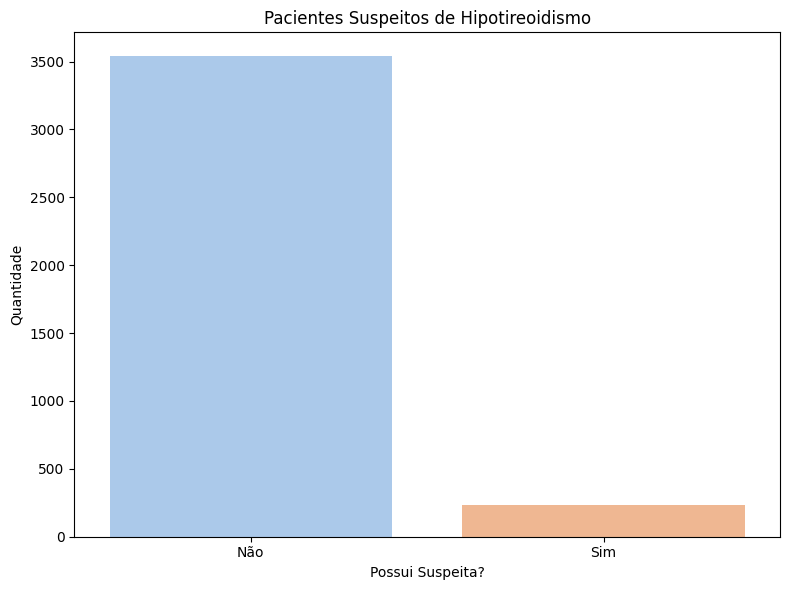


Porcentagem de cada:

query hyperthyroid
Não    93.72
Sim     6.28
Name: proportion, dtype: float64


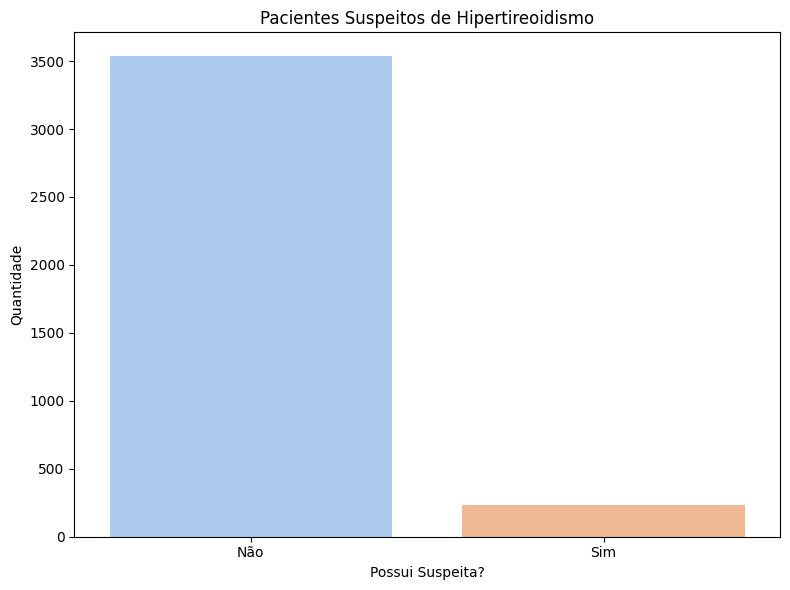


Porcentagem de cada:

on thyroxine
Não    87.7
Sim    12.3
Name: proportion, dtype: float64


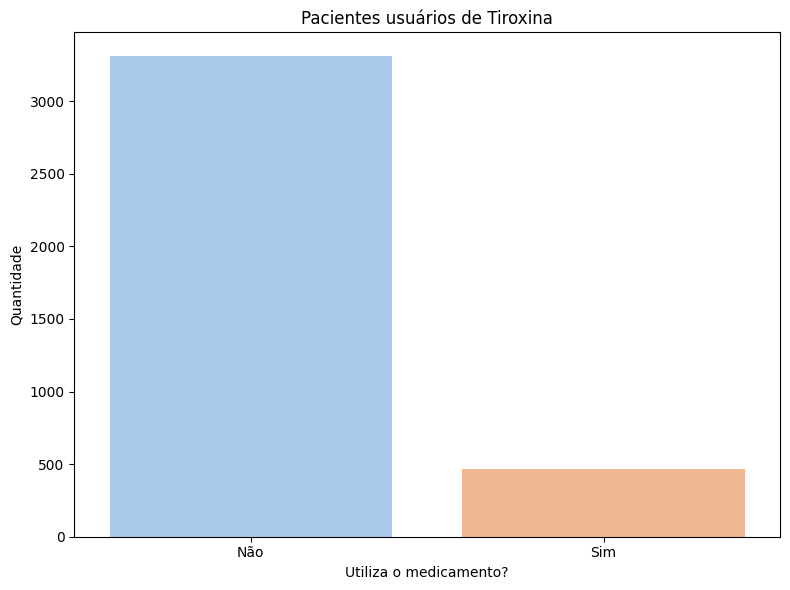


Porcentagem de cada:

query on thyroxine
Não    98.67
Sim     1.33
Name: proportion, dtype: float64


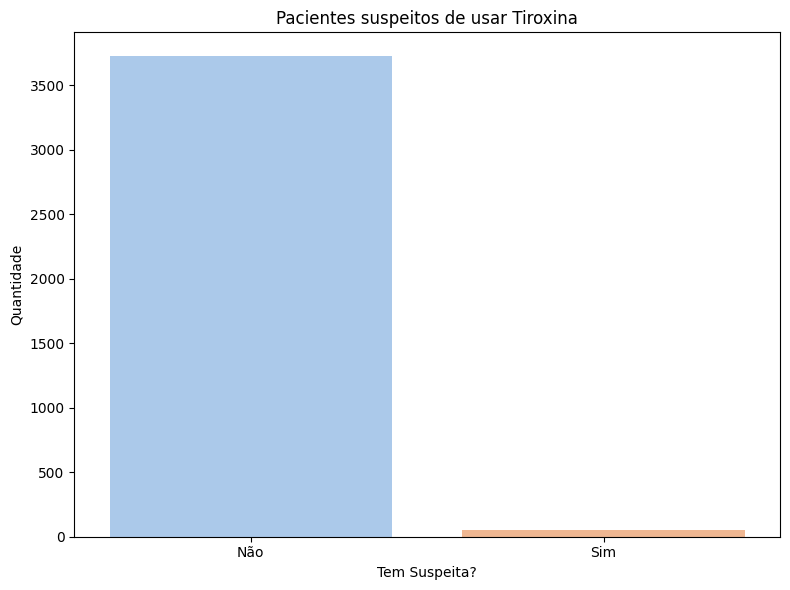


Porcentagem de cada:

psych
Não    95.12
Sim     4.88
Name: proportion, dtype: float64


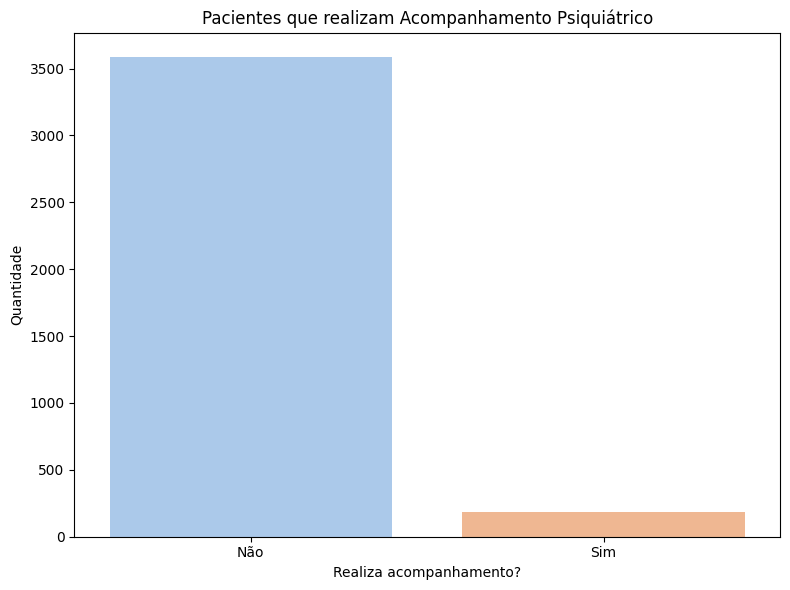


Porcentagem de cada:

TSH measured
Sim    90.22
Não     9.78
Name: proportion, dtype: float64


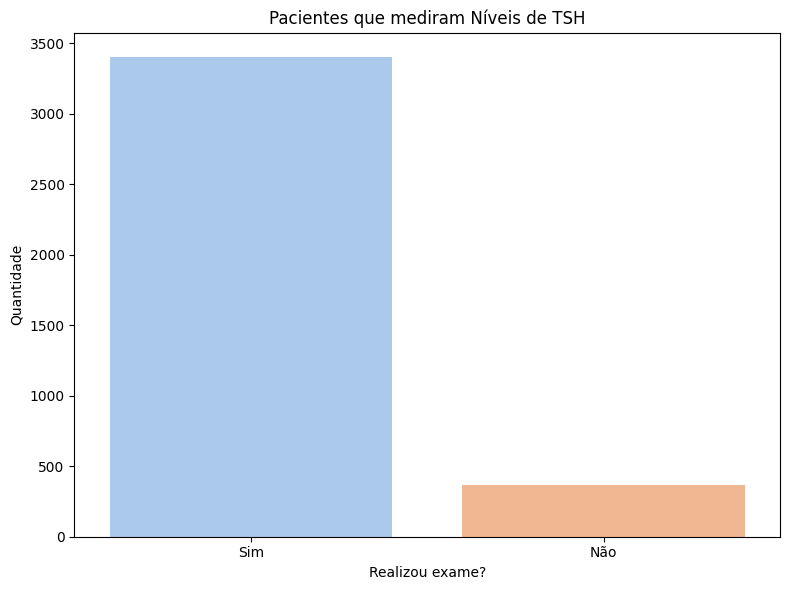


Porcentagem de cada:

T3 measured
Sim    79.61
Não    20.39
Name: proportion, dtype: float64


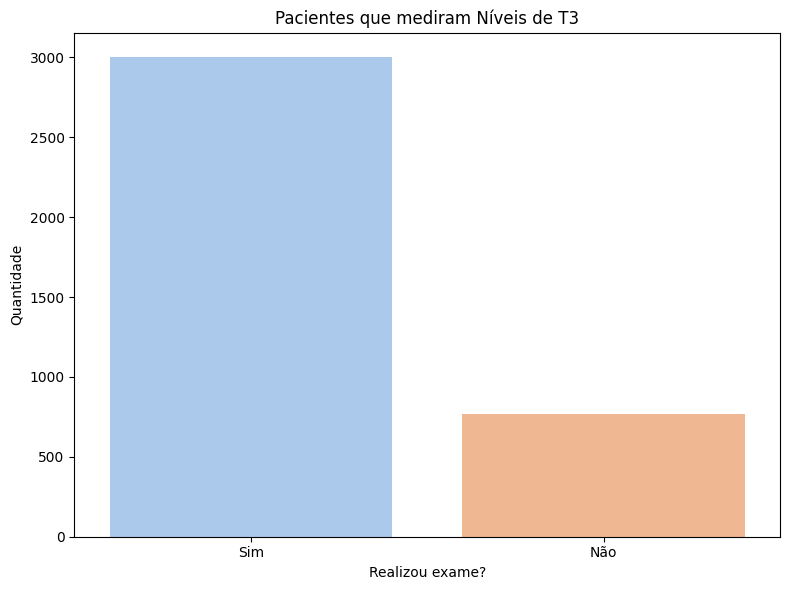


Porcentagem de cada:

TT4 measured
Sim    93.88
Não     6.12
Name: proportion, dtype: float64


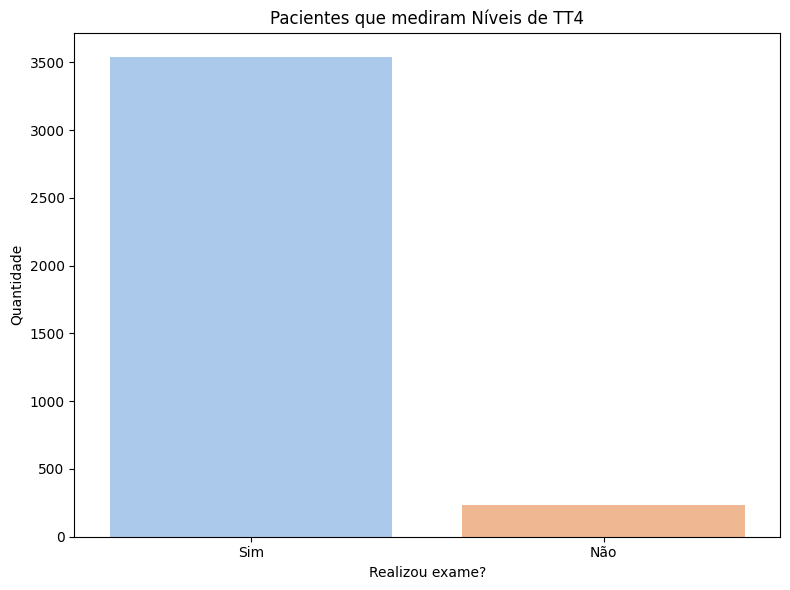


Porcentagem de cada:

T4U measured
Sim    89.74
Não    10.26
Name: proportion, dtype: float64


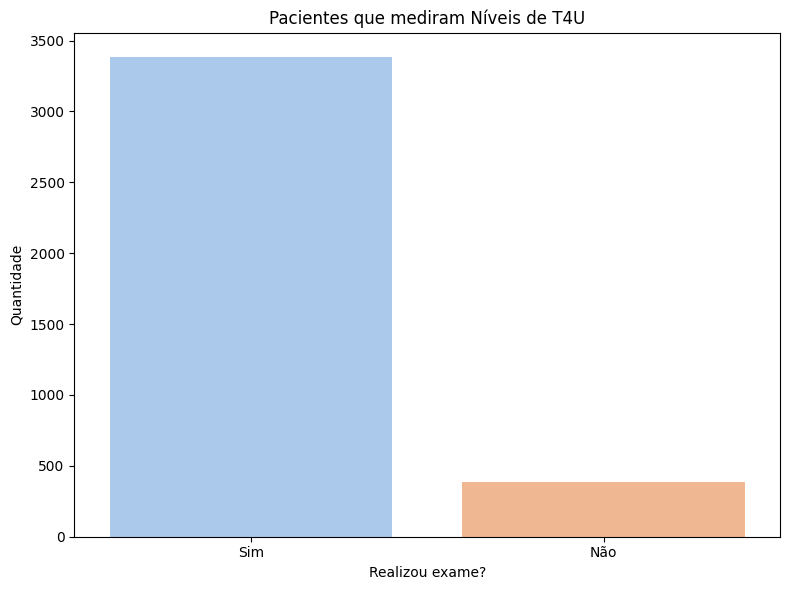


Porcentagem de cada:

FTI measured
Sim    89.79
Não    10.21
Name: proportion, dtype: float64


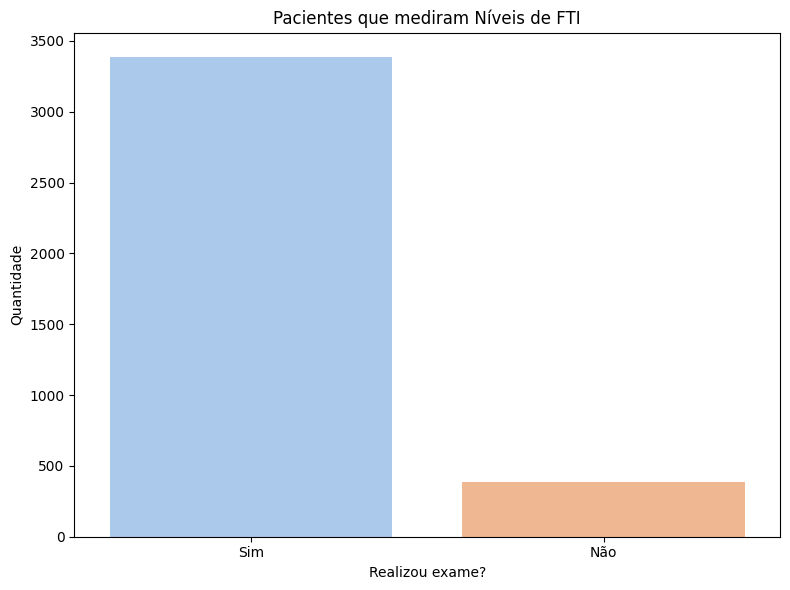

In [ ]:
# Função para realizar plot das variáveis selecionadas a seguir
var = [
    ('binaryClass', 'Pacientes com Doenças de Tireóide', 'Possui Doença de Tireóide?'),
    ('query hypothyroid','Pacientes Suspeitos de Hipotireoidismo','Possui Suspeita?'),
    ('query hyperthyroid', 'Pacientes Suspeitos de Hipertireoidismo', 'Possui Suspeita?'),
    ('on thyroxine', 'Pacientes usuários de Tiroxina', 'Utiliza o medicamento?'),
    ('query on thyroxine', 'Pacientes suspeitos de usar Tiroxina', 'Tem Suspeita?'),
    ('psych', 'Pacientes que realizam Acompanhamento Psiquiátrico', 'Realiza acompanhamento?'),
    ('TSH measured', 'Pacientes que mediram Níveis de TSH', 'Realizou exame?'),
    ('T3 measured', 'Pacientes que mediram Níveis de T3', 'Realizou exame?'),
    ('TT4 measured', 'Pacientes que mediram Níveis de TT4', 'Realizou exame?'),
    ('T4U measured', 'Pacientes que mediram Níveis de T4U', 'Realizou exame?'),
    ('FTI measured', 'Pacientes que mediram Níveis de FTI', 'Realizou exame?')]

def plot_graficos(df, col, titulo, xlabel):
    cont = df[col].replace({0: 'Não', 1: 'Sim'})
    print(f'\nPorcentagem de cada:\n')
    print((cont.value_counts(normalize = True) * 100).round(2))

    plt.figure(figsize = (8, 6))
    sns.countplot(x = cont, hue = cont, palette = 'pastel')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel('Quantidade')
    plt.tight_layout()
    plt.show()

for var, titulo, xlabel in var:
    plot_graficos(df, var, titulo, xlabel)

#### **Barras de binaryClass**
<p>A variável target encontra-se extremamente desbalanceada, havendo pouca quantidade de pacientes que não foram diagnosticados com doenças de Tireoide, havendo necessidade de um futuro balanceamento desses dados para a implementação dos modelos de Aprendizado de Máquina.</p>

#### **Barras de query hypothyroid**
<p>Geralmente, pacientes que realizaram exames não haviam suspeitas de hipotireoidismo. No banco de dados, pacientes que possuem essa suspeita são totalizados em 234 pacientes.</p>

#### **Barras de query hyperthyroid**
<p>Para a suspeita de hipertireoidismo, a maioria dos pacientes não possuia suspeitas. No total, os registros de suspeita positiva foram em 237 casos.</p>

#### **Barras de on thyroxine**
<p>O total de pacientes que utilizam a Tiroxina é de 464, não é uma quantidade alta, mas é considerável e relevante para a análise.</p>

#### **Barras de query on thyroxine**
<p>Existem registros de 50 pacientes que possuem suspeita de
utilizarem este medicamento. Este dado pode existir devido à possível omissão do paciente sobre a utilização da Tiroxina ou apenas um detalhe que não foi questionado pelo médico  inicialmente no momento das consultas realizadas. O dado em questão aparenta não indicar relevância suficiente para o projeto, pois não se pode concluir se o paciente realmente estaria utilizando a medicação e, se o paciente estiver de fato tomando a medicação, o diagnóstico positivo seria algum tipo de consequência de seu uso indevido. Dado a justificativa e a quantidade, este item será desconsiderado no momento da aplicação dos modelos de Aprendizado de Máquina.</p>

#### **Barras de psych**
<p>184 pacientes possuem histórico psiquiátrico. Apesar de pequena a quantidade de registros positivos, podem ser relevantes e influentes para o diagnóstico de problemas na Tireoide. Muitos diagnósticos psiquiátricos estão diretamente relacionados a alterações hormonais, principalmente estes  relacionados à glândula.</p>

#### **Barras de TSH measured**
<p>90% dos pacientes registrados realizaram exames para verificação dos níveis de TSH, o que indica que este exame é um fundamental indicador de variações relevantes nos níveis de hormônios produzidos pela Tireoide.</p>

#### **Barras de T3 measured**
<p>Aproximadamente 80% dos pacientes realizaram exames para verificações dos níveis do Hormônio T3. Este dado também mostra que o exame é um forte indicador de problemas na Tireoide, mas não é algo universal nos protocolos clínicos, que o incluiria dentro das baterias de exames, devido aos 20% dos pacientes que não realizaram a verificação dos níveis do hormônio em seu sistema.</p>

#### **Barras de TT4 measured**
<p>93% dos pacientes realizou este exame. Além de se mostrar que este exame é quase indispensável e padrão dentro da bateria de exames, é também notável que há uma confiabilidade alta para avaliar o funcionamento geral da Tireoide.</p>

#### **Barras de T4U measured**
<p>Apesar de estar altamente relacionado ao TT4, a frequência de pedidos de exame de T4U é levemente mais baixa, obtendo 89,7% do total de pacientes. Este dado pode nos mostrar que, apesar da diferença, também é altamente indicado para a avaliação das funções da Tireoide e resultam na conclusão mais precisa ao apresentar para o profissional da saúde.</p>

#### **Barras de FTI measured**
<p>Este exame, assim como os indicados acima, possui grande representatividade devido à quantidade de pacientes que realizaram os exames, também com 89,7%. Há uma grande indicação da realização do exame auxiliando no panorama do quadro clínico do paciente.</p>


Porcentagem de cada:
 Feminino     68.56
Masculino    31.44
dtype: float64


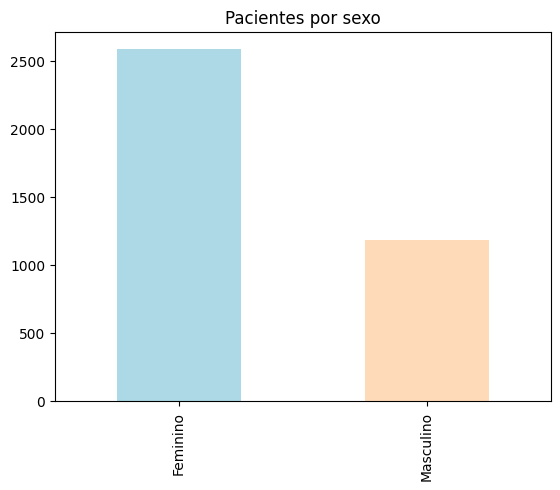

In [ ]:
# Observar quantidade de pacientes femininos e masculinos
sexo_count = df[['sex_F','sex_M']].sum()
sexo_count.index = ['Feminino','Masculino']
print(f'\nPorcentagem de cada:\n', (sexo_count/sexo_count.sum() * 100).round(2))
sexo_count.plot(kind = 'bar', color = ['lightblue', 'peachpuff'], title = "Pacientes por sexo")
plt.show()

#### **Gráfico de barras de sex**
<p>O sexo feminino é predominante na lista de pacientes, compondo 68,5% do total, enquanto o sexo masculino representa 31,5% aproximadamente. Os dados deste banco nos indica que doenças da Tireoide tendem a acometer mais mulheres do que homens, proporcionalmente.</p>

In [ ]:
# Gráfico de barras dos referral sources
referral_cols = [c for c in df.columns if c.startswith('referral source_')]
cont = df[referral_cols].sum().rename_axis('Indicacao').reset_index(name = 'Quantidade')
label_map = {
    'referral source_STMW': 'STMW', 'referral source_SVHC': 'SVHC',
    'referral source_SVHD': 'SVHD', 'referral source_SVI': 'SVI',
    'referral source_other': 'Outros'}
cont['Indicacao'] = cont['Indicacao'].map(label_map)
px.bar(cont, x = 'Indicacao', y = 'Quantidade', color = 'Indicacao', text = 'Quantidade',
       title = 'Distribuição de Encaminhamento').update_traces(
       textposition = 'outside').update_layout(showlegend = False, yaxis_title = 'Quantidade',
                                               xaxis_title = 'Tipo de Encaminhamento',
                                               xaxis = dict(categoryorder = 'total descending')).show()

#### **Barras de tipos de Encaminhamentos**
<p>É compreendido que quase 60% dos pacientes que foram em busca do diagnóstico de doenças da Tireoide, obtiveram encaminhamentos para investigação de maneiras que deveriam ser menos convencionais, indicadas no banco de dados dentro da categoria <b><em>Others</em></b> (Outros). Estes encaminhamentos podem ser feitos por conta própria, de origem externa como instituições que não se encontram nas redes médicas principais ou não identificada pela equipe médica. Em relação aos demais encaminhamentos, seguindo em ordem decrescente, cerca de 27% foram encaminhados por Institutos Médicos (SVI), 10% por indicação de Centros Hospitalares (SVHC), aproximadamente 0,3% por Enfermarias (STMW), e 0,1% por Departamentos Hospitalares Específicos (SVHD).</p>

### Análise Bivariada
<p>Nesta etapa, o cruzamento entre variáveis é realizado e novamente,
levantando possíveis padrões e como se relacionam.</p>

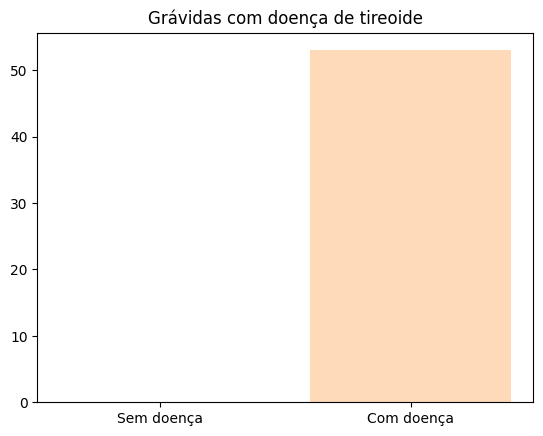

In [ ]:
# Mulheres grávidas x binaryClass
mulheres_gravidas = df[(df['sex_F'] == 1) & (df['pregnant'] == 1)]
contagem = mulheres_gravidas['binaryClass'].value_counts().reindex([0, 1], fill_value = 0)
labels = ['Sem doença de tireoide', 'Com doença de tireoide']
plt.bar(['Sem doença','Com doença'], contagem, color = ['lightblue', 'peachpuff'])
plt.title('Grávidas com doença de tireoide')
plt.show()

#### **Mulheres grávidas tendem a ter doenças de Tireoide?**
<p>A variável pregnant é muito importante para a análise dos modelos de Aprendizado de Máquina, todas as mulheres registradas que constam como grávidas, possuem algum tipo de doença da Tireoide, podendo ser um fator definitivo na análise de um caso de uma paciente feminina e caso de teste positivo de gravidez.</p>

/tmp/ipython-input-1937242081.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



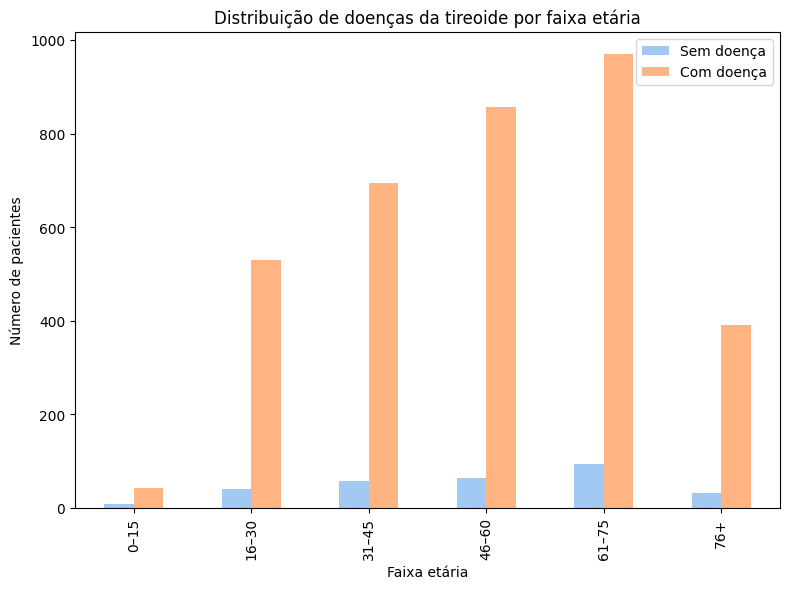

In [ ]:
# Faixa de idade x binaryClass
bins = [0, 15, 30, 45, 60, 75, 95]
rot = ['0–15', '16–30', '31–45', '46–60', '61–75', '76+']
df['age_bin'] = pd.cut(df['age'], bins = bins, labels = rot, right = False)
colors = sns.color_palette('pastel')
contagem = df.groupby(['age_bin', 'binaryClass']).size().unstack(fill_value = 0)
contagem.plot(kind = 'bar', figsize = (8, 6), color = colors,
              title = 'Distribuição de doenças da tireoide por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Número de pacientes')
plt.legend(['Sem doença', 'Com doença'])
plt.tight_layout()
plt.show()

#### **Qual fase da vida é mais propensa a desenvolver essas doenças?**
<p>Apesar de existir uma quantidade considerável de jovens e adultos, entre 16 e 30 anos, a maior porcentagem de pacientes com diagnóstico de doenças da Tireoide encontra-se a partir dos 31 anos, se estendendo até os 75 anos. Isso indica que uma maior quantidade de pacientes dentro dessas faixas, não só procuram saber sobre o diagnóstico como também possuem diagnóstico positivo em boa parte das vezes, sendo por alguns sintomas ou exames anteriores que mostraram determinadas alterações hormonais.</p>

In [ ]:
# Média TSH x binaryClass
media_tsh = df[df['TSH measured'] == 1].groupby('binaryClass')['TSH'].mean().reset_index()
media_tsh['diagnosis'] = media_tsh['binaryClass'].map({0: 'Sem a doença', 1: 'Com a doença'})
fig = px.bar(media_tsh, x = 'diagnosis', y = 'TSH', color = 'diagnosis',
        title = 'Média de TSH por diagnóstico',
        labels = {'TSH': 'TSH médio', 'diagnosis': 'Diagnóstico'})
fig.update_layout(showlegend = False)
fig.show()

#### **Qual a média do TSH de pacientes com doenças de Tireoide e sem?**
<p>Pacientes que possuem diagnóstico Positivo das doenças tendem a possuir uma média de TSH bem mais baixa do que pacientes que não possuem diagnóstico destas doenças. Enquanto pessoas com diagnóstico Positivo têm média 1,81, o grupo Negativo apresenta uma média de 20,16. Lembrando que, estes dados foram levantados com pacientes que fizeram o exame que mede os níveis de TSH.</p>

In [ ]:
# binaryClass x referral sources
df['referral_source'] = df[referral_cols].idxmax(axis = 1).str.replace('referral source_','')
grupo = df.groupby(['referral_source','binaryClass']).size().reset_index(name = 'count')
grupo['diagnosis'] = grupo['binaryClass'].map({0: 'Sem a doença', 1: 'Com a doença'})
fig = px.bar(grupo, x = 'referral_source', y = 'count', color = 'diagnosis', barmode = 'stack',
    labels = {'referral_source': 'Encaminhamento', 'diagnosis': 'Diagnóstico', 'count': 'Número de Pacientes'},
    title = 'Distribuição dos encaminhamentos por Diagnóstico')
fig.show()

#### **Qual encaminhamento possui maior taxa de confirmação de doenças da Tireoide?**
<p>Em sua maioria, a categoria others possuem maior taxa de
encaminhamentos e por consequência uma maior quantidade de diagnósticos positivos. Apesar dos demais também apresentarem maioria de diagnóstico positivo, proporcionalmente, podemos concluir que esta categoria consegue identificar melhor pacientes potencialmente acometidos por essas doenças. Esta categoria pode abranger encaminhamento por consultas particulares de profissionais específicos, auto encaminhamento, terapêuticos, entre outros.</p>

In [ ]:
# TSH x FTI, T3, T4U e TT4
df_comp = df.melt(id_vars = 'TSH', value_vars = ['T3', 'FTI', 'TT4', 'T4U'],
                  var_name = 'Hormônio', value_name = 'Valor')
df_filtrado = df_comp[(df_comp['TSH'] > 0) & (df_comp['Valor'] > 0)]
fig = px.scatter(df_filtrado, x = 'TSH', y = 'Valor', color = 'Hormônio',
                facet_col = 'Hormônio', labels = {'TSH': 'TSH', 'Valor': 'Nível do hormônio'},
                title = 'Comportamento de T3, FTI, TT4 e T4U em função do TSH')
fig.show()

#### **Como a alteração do TSH fazem T3, FTI e TT4, T4U se comportarem?**
<p>Tsh em comparação ao FTI e TT4: É possível observar que o
comportamento dos hormônios são bem parecidos. Quanto maiores os níveis de TSH, menores são os níveis de FTI e TT4. Além disso, a situação inversa ocorre da mesma maneira, ou seja, os resultados dos exames são inversamente proporcionais. Isso nos informa que, a produção elevada de um é feita para ter uma compensação do que não é produzido pelo outro. Isso pode nos mostrar também que existe uma facilidade maior em analisar possíveis desequilíbrios hormonais, principalmente se medirmos estes dois hormônios em conjunto com TSH.</p>

<p>Já se tratando de T3 e T4U, os níveis de ambos tendem a se manter mais estáveis com produção baixa, independente dos níveis de TSH no sangue do paciente, mesmo T3 possuindo uma oscilação levemente maior em seus níveis quando os níveis de TSH estão mais baixos. Em suma, não há relação forte entre estes dois hormônios e os níveis de TSH do paciente.</p>

      age  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
125    62             1                   0                          0     0   
367    74             1                   0                          1     0   
375    18             1                   0                          0     0   
544    76             0                   0                          0     0   
562    65             0                   0                          0     0   
1134   39             0                   0                          0     0   
1475   39             0                   0                          0     0   
1971   76             0                   0                          0     0   
2033   27             1                   0                          0     0   
2302   71             1                   0                          0     0   
2417   17             0                   0                          0     0   
2711   77             0                 

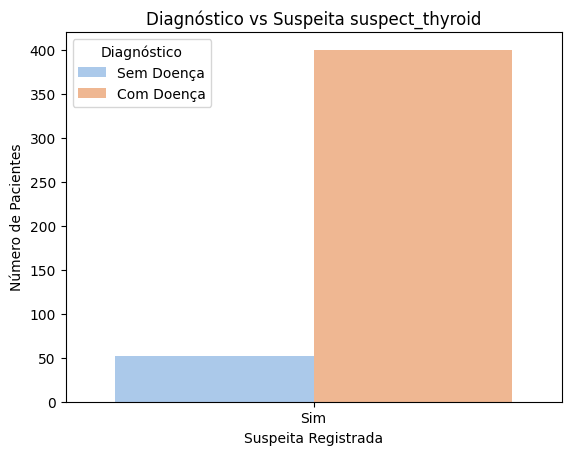

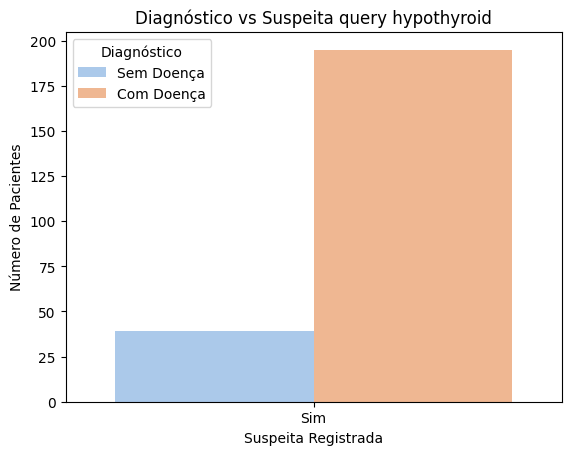

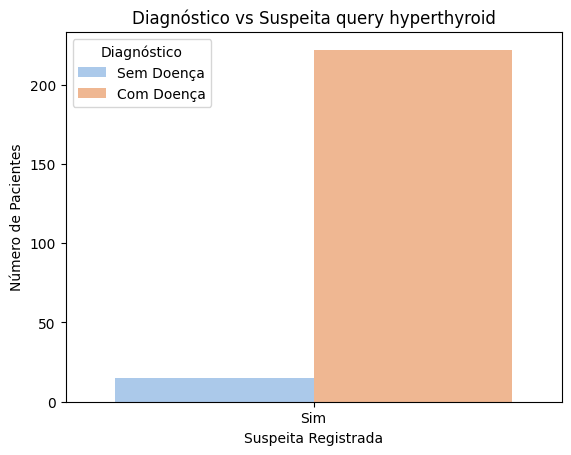

In [ ]:
# binaryClass x Suspeitos (Hiper, Hipo e Ambos)
df['suspect_thyroid'] = ((df['query hypothyroid'] == 1) | (df['query hyperthyroid'] == 1)).astype(int)
df_sus = df[df['suspect_thyroid'] == 1]
df_sus_hypo = df[df['query hypothyroid'] == 1]
df_sus_hyper = df[df['query hyperthyroid'] == 1]

a = (df['query hypothyroid']==1) & (df['query hyperthyroid']==1)
print(df[a])

def graf_sus_x_diag(df, col_query, target_col = 'binaryClass'):
    grupo = df.groupby([col_query, target_col]).size().reset_index(name = 'count')
    grupo[target_col] = grupo[target_col].map({0: 'Sem Doença', 1: 'Com Doença'})
    grupo[col_query] = grupo[col_query].map({0: 'Não', 1: 'Sim'})
    sns.barplot(data = grupo, x = col_query, y = 'count', hue = target_col, palette = 'pastel')
    plt.title(f'Diagnóstico vs Suspeita {col_query}')
    plt.xlabel('Suspeita Registrada')
    plt.ylabel('Número de Pacientes')
    plt.legend(title = 'Diagnóstico')
    plt.show()

graf_sus_x_diag(df_sus, 'suspect_thyroid')
graf_sus_x_diag(df_sus_hypo, 'query hypothyroid')
graf_sus_x_diag(df_sus_hyper, 'query hyperthyroid')

#### **Geralmente, pessoas registradas com suspeita de hipotireoidismo estão com a suspeita correta? E com hipertireoidismo?**
<p>Do total de 452 suspeitas vindos da soma de ambos problemas, 400 pacientes de fato possuíam diagnósticos positivos de algum deles. Dentro deste total, 234 possuem suspeitas de hipotireoidismo e foram confirmadas com diagnóstico positivo de presença de doenças da Tireoide.</p>

<p>Deste mesmo total, 222 pacientes que possuíam alguma suspeita de hipertireoidismo, tiveram diagnóstico positivo. Além disso, 19 pacientes possuem suspeita de ambas doenças os quais 17 foram diagnosticados com positivo, porém não há especificação de qual delas, devido a <em>binaryClass</em> ser uma classe que apenas prevê Positivo e Negativo para alterações da glândula de maneira generalizada. Quanto aos demais que possuem apenas uma, podemos supor que elas estavam corretas, pelo fato do outro diagnóstico ser descartado por motivos específicos.</p>

In [ ]:
# Unificando coluna 'sex' para utilizar na análise
df['sex_def'] = np.where(df['sex_F'] == 1, 'Feminino',
                         np.where(df['sex_M'] == 1, 'Masculino', ''))
# Lista de variáveis para a função
var = [
    # psych x binaryClass
    ('psych', 'binaryClass', 'Histórico Psiquiátrico vs. Doença de Tireóide', 'Histórico Psiquiátrico?',
     'Diagnóstico', {0: 'Não', 1: 'Sim'}, {0: 'Sem Doenças da Tireóide', 1: 'Com Doenças da Tireóide'}),
    #sex_def x binaryClass
    ('sex_def', 'binaryClass', 'Diagnóstico por Sexo do Paciente', 'Sexo do Paciente', 'Diagnóstico',
     {'Masculino':'Masculino','Feminino':'Feminino'}, {0: 'Sem Doenças de Tireóide', 1: 'Com Doenças de Tireóide'}),
    #I131 treatment x binaryClass
    ('I131 treatment', 'binaryClass', 'Doença da Tireóide vs Tratamento com Iodo Radioativo',
     'Trata com Iodo Radioativo?', 'Diagnóstico', {0: 'Não', 1: 'Sim'}, {0: 'Sem a Doença', 1: 'Com a Doença'}),
    # lithium x binaryClass
    ('lithium', 'binaryClass', 'Doença da Tireoide vs Uso de Lítio', 'Usa Lítio?', 'Diagnóstico',
     {0: 'Não', 1: 'Sim'}, {0: 'Sem a Doença', 1: 'Com a Doença'}),
    # psych x lithium
    ('psych', 'lithium', 'Uso de Lítio em Pacientes com/sem Histórico Psiquiátrico', 'Histórico Psiquiátrico?',
     'Usa Lítio?', {0: 'Não', 1: 'Sim'}, {0: 'Não', 1: 'Sim'}),
    # on antithyroid medication x query hyperthyroid
    ('on antithyroid medication', 'query hyperthyroid', 'Antitireoidiano vs Suspeita de Hipertireoidismo',
     'Usa Antitireoidiano?', 'Suspeita de Hipertireoidismo?', {0: 'Não',1: 'Sim'}, {0: 'Não Possui',1: 'Possui'}),
    # on thyroxine x query hypothyroid
    ('on thyroxine', 'query hypothyroid', 'Tiroxina vs Suspeita de Hipotireoidismo', 'Usa Tiroxina?',
     'Suspeita de Hipotireoidismo?', {0: 'Não',1: 'Sim'}, {0: 'Não Possui',1: 'Possui'}),
    # tumor x binaryClass
    ('tumor', 'binaryClass', 'Tumor vs Doença da Tireóide', 'Presença de Tumor?', 'Doença da Tireóide?',
     {0: 'Não', 1: 'Sim'}, {0: 'Sem a doença', 1: 'Com a doença'}),
    # goitre x binaryClass
    ('goitre', 'binaryClass', 'Bócio vs Doença da Tireoide', 'Presença de Bócio?', 'Doença da Tireóide?',
     {0: 'Não', 1: 'Sim'}, {0: 'Sem a Doença', 1: 'Com a Doença'})]

# Função para geração de gráficos
def graf_cruzados(df, col1, col2, title, xlabel, subt, map1, map2):
    df['sep1'] = df[col1].map(map1)
    df['sep2'] = df[col2].map(map2)
    grupo = df.groupby(['sep1', 'sep2']).size().reset_index(name = 'count')

    fig = px.bar(grupo, x = 'sep1', y = 'count', color = 'sep2', barmode = 'stack',
        labels = {'sep1': xlabel, 'sep2': subt, 'count':'Número de Pacientes'},
        title = title)
    fig.show()

# Loop para geração de todos
for col1, col2, title, xlabel, subt, map1, map2 in var:
    graf_cruzados(df, col1, col2, title, xlabel, subt, map1, map2)

#### **Pessoas com histórico psiquiátrico tendem problemas na Tireoide?**
<p>Apesar da maioria dos pacientes não possuírem histórico
psiquiátrico, vemos que, de 184 pacientes, 176 possuem histórico psiquiátrico. Sendo assim, podemos concluir que é provável que um paciente que possui histórico psiquiátrico possua alguma doença da Tireoide, demonstrando que o dado de histórico possui relevância para a análise.</p>

#### **Qual sexo tem maior tendência a possuir o diagnóstico?**
<p>A incidência de casos Positivos para ambos os sexos é bem alta, demonstrando maioria de pacientes com doenças de Tireoide na base, como indicado anteriormente. Apesar de ambos possuírem maior número em diagnóstico Positivo, proporcionalmente, o sexo feminino possuí incidência levemente maior.</p>

#### **Pessoas que realizam o tratamento com iodo radioativo, costumam desenvolver doenças da Tireoide?**
<p>Assim como a variável <b><em>Psych</em></b> relacionada com diagnóstico, existe uma probabilidade grande de pacientes que realizaram tratamento com iodo radioativo possuir algum tipo de doença de Tireoide. No total de 59 pacientes que realizaram este tratamento, apenas 5 deles não tem diagnóstico destas doenças.</p>

#### **O lítio (usado para tratar transtorno bipolar) é um fator de risco para desenvolver doenças da Tireoide? Quantos pacientes com histórico psiquiátrico fazem uso deste medicamento? Alguém que não possuí histórico faz?**
<p>Neste caso, também percebemos que há uma maioria de pacientes que não realizam tratamento com lítio, porém, os pacientes que utilizam o lítio, tem maior probabilidade de estar acometidos com alguma doença da Tireoide, possuindo apenas 1 paciente dentre 18 com resultado negativo para as doenças.</p>

<p>Apesar de ser um remédio recomendado para tratamento de
bipolaridade e outras doenças psicológicas, geralmente diagnosticado por profissionais da área da psiquiatria, 15 dos 18 pacientes não possuem histórico psiquiátrico, mostrando que o uso é feito por conta própria sem avaliação médica para tal uso, insinuando que pelo menos 14 desses pacientes estão sendo afetados pelo suposto uso indevido de lítio.</p>

#### **O tratamento com medicação antitireoidiana está alinhado com as suspeitas de hipertireoidismo? E a tiroxina, está alinhada ao de hipotireoidismo?**
<p>É visto nitidamente que, apesar de haver poucas pessoas que
utilizam a medicação antitireoidiana, apenas 15 dos 43 pacientes possuem suspeita. Isso nos informa que as suspeitas não se alinham ao uso da medicação, visto que outros 222 pacientes possuem suspeita de hipertireoidismo e não estão utilizando a medicação, quase 15 vezes a quantidade total do cenário anterior. A pequena parcela que usa o remédio e não tem suspeita, possívelmente se medica de maneira indevida.</p>

<p>Tratando-se do outro cenário para hipotireoidismo, há uma
situação mais alarmante. Existem mais pessoas utilizando a tiroxina sem suspeita, do que pessoas que realmente possuem suspeita. Apesar da possível existência de falhas no registro da suspeita de alguns pacientes, se caso os pacientes estejam manuseando a tiroxina de maneira indevida, poderá gerar complicações no organismo, como o desenvolvimento de hipertireoidismo, outras alterações neurológicas e piora no desempenho metabólico.</p>

#### **Das pessoas que possuem tumor, quantas têm doenças de Tireoide?**
<p>Observamos uma quantidade pequena, totalizando 96 pacientes que possuem algum tipo de tumor na região da glândula, onde encontramos 88 deles que testaram positivo para o diagnóstico de doença da Tireoide. É possível deduzir que, ao possuir qualquer tipo de tumor, em sua maioria, existe maior tendência a alterações hormonais na glândula, causando as doenças da glândula, não necessariamente importando a natureza do tumor. Pacientes que não possuem a doença e possuem tumor, podem estar diante de uma situação de investigação mais profunda para descobrir a natureza do tumor, visto que a possibilidade destas doenças foi descartada.</p>

<p>Os pacientes que não possuem tumor e apresentam doenças da Tireoide constituem maioria, totalizando 3393 casos, nos mostrando que as doenças surgem de maneira multifatorial.</p>

#### **O bócio (goitre) parece ser associado à presença das doenças da Tireoide?**
<p>Encontramos 34 pacientes com bócio, que consiste no aumento
anormal da glândula. Todos os pacientes registrados com este aumento possuem alguma doença na Tireoide, indicando que este
problema está diretamente associado com elas, podendo ser hipo, hipertireoidismo, nódulos ou doenças autoimunes.</p>

In [ ]:
# binaryClass x hiper + antitireoidiano -- & -- binaryClass x hipo + tiroxina
df['antithyroid_hyper'] = ((df['on antithyroid medication'] == 1) & (df['query hyperthyroid'] == 1)).astype(int)
df['thyroxine_hypo'] = ((df['on thyroxine'] == 1) & (df['query hypothyroid'] == 1)).astype(int)

# Função para geração de gráficos
def graf_susmed_x_diag(df, col_query, target_col = 'binaryClass'):
    grupo = df.groupby([col_query, target_col]).size().reset_index(name = 'count')
    grupo[target_col] = grupo[target_col].map({0: 'Sem Doença', 1: 'Com Doença'})
    grupo[col_query] = grupo[col_query].map({1: 'Sim'})

    fig = px.bar(grupo, x = target_col, y = 'count', color = col_query, barmode = 'stack',
        labels = {target_col: 'Qual Diagnóstico?' ,'count':'Número de Pacientes'},
        title = 'Diagnóstico para pacientes Medicados e com Suspeita')
    fig.show()

# Chamando Função
graf_susmed_x_diag(df, 'antithyroid_hyper')
graf_susmed_x_diag(df, 'thyroxine_hypo')

#### **Pacientes que se medicam e tem suspeita dos cenários acima, testaram positivo para doenças da Tireoide?**
<p>Extraindo apenas pacientes que possuem suspeita e que estão sendo medicados de ambos cenários, é percebido que todos que possuíam suspeitas de hipertireoidismo de fato foram diagnosticados positivamente com doença de Tireoide, demonstrando boa acurácia nos casos dessa doença. Porém, para pacientes com hipotireoidismo, não possuímos mesma taxa de acerto, por mais que alta, visto que 3 dos 57 não são acometidos pela doença.</p>

<p>Estes dados reforçam a importância de saber o diagnóstico antes da aplicação de medicamentos. Apesar de ocorrer em uma parcela pequena da total de pacientes, as alterações podem ser difíceis de se remediar ou até mesmo irreversíveis, havendo necessidade de tratamento vitalício, por exemplo.</p>

In [ ]:
# Hormonios x encaminhamentos
exames = ['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured']
df_filtrado = df[df[exames].sum(axis = 1) > 0].copy()
df_counts = (df_filtrado.groupby('referral_source')[exames].sum().reset_index())
df_long = df_counts.melt(id_vars = 'referral_source', value_vars = exames, var_name = 'exame', value_name = 'count')
fig = px.bar(df_long, x = 'referral_source', y = 'count', color = 'exame', barmode = 'group', text = 'count',
            title = 'Quantidade de pacientes que realizaram cada exame por encaminhamento')
fig.update_traces(textposition = 'outside').update_layout(xaxis_title = 'Encaminhamento', yaxis_title = 'Quantidade de pacientes')
fig.show()

#### **Os tipos de encaminhamento realizado interferem na bateria d exames realizados para verificar o diagnóstico?**
<p>O encaminhamento dos pacientes vindos de alguma unidade
hospitalar, tendem a possuir protocolos mais padronizados nas
baterias de exames, com pequena oscilação e boa consistência na quantidade de pedidos dentro do total de pacientes direcionados para cada um dos tipos de encaminhamento. Unidades Hospitalares como <b>STMW</b>, <b>SVHC</b> e <b>SVHD</b> possuem uma margem curta de pedidos não realizados, com <b>STMW</b> tendo de 111 pedidos de TSH até 101 para T3, <b>SVHC</b> com maioria de 385 pacientes realizando TT4 e 373 realizando T3, e em <b>SVHD</b> 39 para TSH e 36 pacientes em T3 (demais exames inclusos dentro das margens apresentadas).</p>

<p>A situação é diferente para as categorias <b>SVI</b> e <b><em>Other</em></b>, onde aparenta não existir protocolo certo ou universal, e sim que os exames foram feitos de maneira individual conforme o levantamento das suspeitas. Essas maiores diferenças ocorrem também devido à variedade de instituições, clinicas particulares que não seguem protocolos estabelecidos entre os ambientes de redes hospitalares. Vemos uma grande discrepância entre o exame mais e menos pedido. Em
<b>SVI</b>, TT4 foi o exame com mais pedidos, totalizando 1030, já T3 possui apenas 986 pacientes que realizaram este exame. A diferença se torna muito mais evidente na categoria <b><em>Other</em></b>, onde o exame TT4 tem 1978 pedidos e T3 com apenas 1507.</p>

## Pré-Processamento dos Dados, Modelagem e Avaliação Inicial
<p>As etapas a seguir consistem na identificação das variáveis mais bem relacionadas com a variável alvo, indicação dos modelos utilizados dentro do projeto, definição da melhor formatação dos dados para, em seguida, dar início às fases de teste destes modelos. A base de dados foi separada em bases de treino e de teste com proporção de 70% para base de treino e 30% para base de teste.</p>

<p>As próximas etapas de Modelagem e Avaliação Inicial dos modelos estão descritas abaixo.</p>

In [ ]:
# Matriz de correlação
corr = df_ml.corr(numeric_only = True)
corr_matriz = corr.reset_index().melt(id_vars = 'index')
fig = px.imshow(corr, text_auto = True, color_continuous_scale = 'RdBu',
                zmin = -1, zmax = 1, title = 'Matriz de Correlação')
fig.update_xaxes(side = 'top')
fig.update_coloraxes(colorbar_title = 'Nível de Correlação')
fig.show()

### Matriz de Correlação
<p>Existem poucas variáveis que possuem correlações mais elevadas com a variável alvo: TSH, TT4 e FTI. Tratando-se de correlações entre demais variáveis, as relações de determinadas <em>features</em> entre si, também aparentam relevância e podem contribuir com os resultados de acurácia dos modelos de Aprendizado de Máquina a serem aplicados. As
que possuem mais variáveis correlacionadas a elas são: <em>Age, referral source (SVI, SVHC e Other), sick, psych,</em> exames realizados (colunas <em>measured</em>), resultados dos exames e <em>pregnant</em>.</p>

Balanceamento: 
 binaryClass
1    2436
0    2436
Name: count, dtype: int64


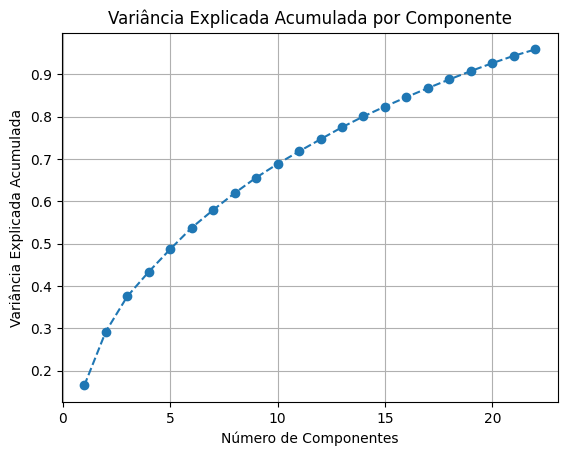

In [ ]:
# Separação das bases de Treino e Teste
x = df_ml.drop(columns = ['binaryClass'])
y = df_ml['binaryClass']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

# Padronização dos dados com StandardScaler
sc = StandardScaler()
x_treino_sc = sc.fit_transform(x_treino)
x_teste_sc = sc.transform(x_teste)

# Balanceando dados de treino com Smote para oversampling
smote = SMOTE(random_state = 42, k_neighbors = 3, sampling_strategy = 1.0)
x_treino_s, y_treino_s = smote.fit_resample(x_treino_sc, y_treino)
print('Balanceamento: \n', y_treino_s.value_counts())

# Reduzindo Dimensionalidade com PCA
pca = PCA(n_components = 22)
x_treino_pca = pca.fit_transform(x_treino_s)
x_teste_pca = pca.transform(x_teste_sc)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, 23), cumulative_variance, marker = 'o', linestyle = '--')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

### Modelos Selecionados
<p>Os modelos de Aprendizado de Máquina a serem utilizados para a comparação de melhor desempenho serão modelos robustos que realizam classificações de maneiras diferentes: <b><em>XGBoost</em></b> e <b><em>SVC</em></b>.</p>

<p><b><em>XGBoost</em></b> é um modelo não linear que utiliza múltiplas árvores de decisão em sequência para que, com a correção de cada uma, cheguemos em um modelo final mais ideal, com maior quantidade de acertos mais precisos nas previsões. Já o <b><em>SVC</em></b> busca encontrar um hiperplano ideal que possa separar as classes de uma maneira mais clara, baseada na maior margem possível que o algoritmo gerar neste hiperplano, a partir de uma abordagem matemática sólida, melhorando assim a capacidade de generalização.</p>

---
### Padronização das bases com StandardScaler
<p>A utilização do StandardScaler é fundamental para o projeto, pois melhora o desempenho dos algoritmos de Aprendizado de Máquina, contribuindo com maior precisão, diminuindo enviesamento e trazendo maior equilíbrio entre valores elevados, ajudando assim algoritmos mais sensíveis a estas oscilações como o <b><em>SVC</em></b> e <b><em>PCA</em></b>, mantendo média igualada a 0 e desvio padrão em 1.</p>

___
### Redução de Dimensionalidade com PCA (Análise de Componentes Principais)
<p>A Redução de Dimensionalidade também é de extrema importância para este projeto, visto que existe uma quantidade considerável de variáveis que não aparentam estar bem relacionadas com a alvo, ou entre os demais elementos da base, conforme a Matriz de Confusão realça.</p>

<p>Além disso, a diminuição com o <b><em>PCA</em></b> tende a melhorar o desempenho, diminui o risco de <em>overfitting</em>*, elimina redundâncias e é uma ferramenta útil para algoritmos sensíveis à grandes volumes de variáveis. A quantidade ideal encontrada para o melhor resultado, foi de 22 componentes dentre os 32 presentes ao final do tratamento.</p>

> **DICIONÁRIO:**
>
> **Overfitting*: O *overfitting* ocorre quando o modelo apenas > aprende os detalhes específicos presentes dentro da base de treino, perdendo assim a capacidade de entender e classificar novos dados. Em suma, o algoritmo decora a base de treino, não aprendendo de maneira efetiva classificar bem os novos registros.

___
### Aplicação de Balanceamento com SMOTE
<p>Como visualizado na fase inicial da Análise dos Dados, existe um grande desbalanceamento da variável alvo, onde 92,3% dos pacientes registrados possuem doenças da Tireoide, enquanto apenas 7.7% não tem o diagnóstico. Essa diferença entre as classes pode causar problemas de classificação da classe minoritária, assim havendo a necessidade de balanceá-las.</p>

<p>Foi optado realizar a criação de linhas de pacientes fictícios baseado nesta minoria presente. Por isso, o SMOTE será utilizado a fim de igualar a quantidade de casos  m ambos os grupos. Este procedimento é chamado de <em>oversampling</em>.</p>


In [ ]:
# Função para gerar curva ROC-AUC
def plot_roc_auc(y_true, y_proba, modelo = 'Modelo'):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)

    plt.figure(figsize = (8, 6))
    plt.plot(fpr, tpr, lw = 2, label = f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color = 'crimson', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title(f'Curva ROC - {modelo} (Classe Positiva)')
    plt.legend(loc = 'lower right')
    plt.show()

# Função para testar e avaliar modelos
def avaliar_mods(modelos, x_teste_f, y_teste_f):
    for nome, mod in modelos.items():
        y_pred = mod.predict(x_teste_f)
        y_proba = mod.predict_proba(x_teste_f)[:, 1]

        rel = classification_report(y_teste_f, y_pred, labels = [0, 1], target_names=['Negativa', 'Positiva'])
        matriz = confusion_matrix(y_teste_f, y_pred)
        acuracia = accuracy_score(y_teste_f, y_pred)

        print(f'\nResultados {nome} - Acurácia: {acuracia:.2f}')
        print(f'\nRelatório base teste {nome}:\n{rel}')
        print(f'\nMatriz de Confusão:\n{matriz}')

        # Função auxiliar auc-roc
        plot_roc_auc(y_teste_f, y_proba, modelo = nome)

# Reaplicando RandomizedSearch com novos hiperparâmetros para ambos modelos
def exec_random_search(nome_modelo, estimator, param_grid, x_train, y_train,
                        scoring = None, cv = None, n_iter = None, random_state = 42, verbose = 1):
    rs = RandomizedSearchCV(estimator = estimator, param_distributions = param_grid,  n_iter = n_iter, cv = cv,
                            scoring = scoring, verbose = verbose,  n_jobs = -1, random_state = random_state)
    rs.fit(x_train, y_train)
    print(f'Melhores parâmetros {nome_modelo}:', rs.best_params_)
    return rs.best_params_, rs.best_estimator_

# Melhorando valores threshold
def escolher_threshold(model, x_pca, y_true, thresholds = np.arange(0.30, 0.70, 0.01),
                       min_recall = 0.90, min_precision = 0.92):
    scores = model.predict_proba(x_pca)[:, 1]
    best_thr, best_prec, best_rec = 0.5, 0, 0

    for thr in thresholds:
        y_pred = (scores >= thr).astype(int)
        p = precision_score(y_true, y_pred)
        r = recall_score(y_true, y_pred)
        if r >= min_recall and p >= min_precision and p > best_prec:
            best_thr, best_prec, best_rec = thr, p, r

    print(f'\nLimiar escolhido: {best_thr:.2f} → Precision = {best_prec:.3f}, Recall = {best_rec:.3f}')
    return (scores >= best_thr).astype(int), best_thr

# Relatório modelos finais com threshold selecionado e curva auc-roc
def relatorio_threshold(y_true, y_pred, best, t_pca, model='Modelo', thresh=None):
    print(f'\nRelatório com Limiar ajustado ({model} - Negativa como foco):')
    if thresh is not None:
        print(f'Limiar usado: {thresh:.2f}')
    print(classification_report(y_true, y_pred, labels=[0, 1], target_names=['Negativa', 'Positiva']))
    print('Matriz de confusão:')
    print(confusion_matrix(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    print(f'Resultados - Acurácia: {acc:.2f}')

    scores = best.predict_proba(t_pca)[:, 1]
    plot_roc_auc(y_true, scores, modelo = model)

### Funções
<p>A função <b><em>PLOT_ROC_AUC</em></b> tem o objetivo de gerar o gráfico da curva <b>ROC-AUC</b>, que avalia a capacidade do modelo de distinguir a classe de escolha, neste caso, a classe Positiva. Ele faz isso traçando a relação entre a taxa de verdadeiros positivos e a taxa de
falsos positivos, formando uma curvatura no gráfico. A  Métrica AUC calcula a área entre a reta neutra (0.5) e a borda da curvatura. Quanto mais próximo este cálculo estiver de 1, melhor a excelência do algoritmo.</p>

<p>As avaliações dos modelos selecionados serão realizadas pela função <b><em>AVALIAR_MODS</em></b>, que realiza previsões e mostra um relatório de desempenho contendo valores de precisão*, sensibilidade*, acurácia*, <b>f1-score</b>*, além de disponibilizar uma Matriz de Confusão para mostrar acertos e erros de cada classe em quantidade.</p>

<p>Ao executar <b><em>EXEC_RANDOM_SEARCH</em></b> é criado uma função <b><em>RandomizedSearchCV</em></b> realizando uma busca das melhores combinações de hiperparâmetros através de arranjos aleatórios e selecionando o modelo que apresenta melhor desempenho.</p>

<p>A função <b><em>ESCOLHER_THRESHOLD</em></b> nos permite achar um <em>threshold*</em> ideal para que precisão e a sensibilidade consigam alcançar os valores que atendam aos critérios mínimos definidos, focando em um bom desempenho para a classe de diagnóstico negativo.</p>

<p>Tratando-se da função <b><em>RELATORIO_THRESHOLD</em></b>, esta exibe os valores de limiar escolhidos para cada um dos <em>scorings</em>* selecionados, além de um novo relatório de classificação que exibe os resultados com os limiares aplicados aos modelos, seguido da matriz de confusão e avaliação final da acurácia.</p>

> **DICIONÁRIO:**
>
>**Threshold* ou limiar: é o valor de corte escolhido para
> transformar a probabilidade em uma decisão binária (classe 0 ou 1).
>
> **Accuracy* ou Acurácia: Exibe proporção de previsões corretas em relação ao total de previsões realizadas.
>
> **Precision* ou Precisão: Calcula a proporção de previsões positivas feitas corretamente.
>
> **Recall* ou Sensibilidade: Mede a capacidade do algoritmo de identificar corretamente casos positivos.
>
> **F1-score*: É o cálculo da média harmônica de precisão e sensibilidade.
>
> **Scoring*: Nesta função, é o que determina a escolha dos parâmetros para melhor favorecer o resultado da métrica escolhida.


Resultados XGBoost - Acurácia: 0.98

Relatório base teste XGBoost:
              precision    recall  f1-score   support

    Negativa       0.83      0.97      0.89        87
    Positiva       1.00      0.98      0.99      1045

    accuracy                           0.98      1132
   macro avg       0.91      0.97      0.94      1132
weighted avg       0.98      0.98      0.98      1132


Matriz de Confusão:
[[  84    3]
 [  17 1028]]


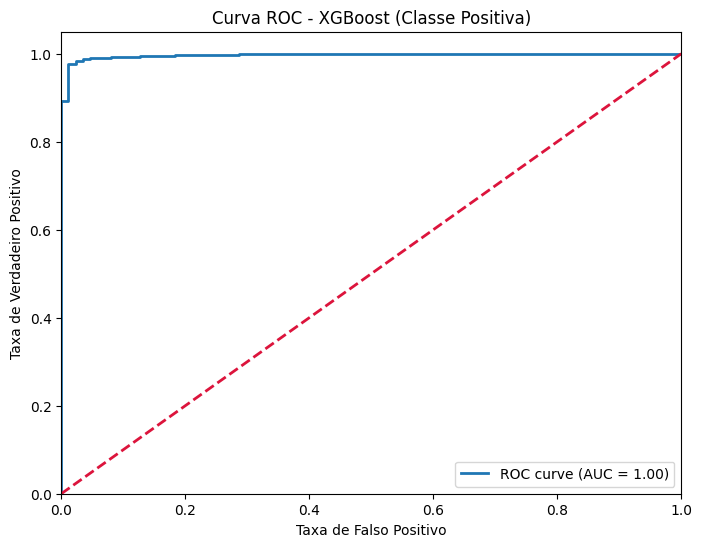


Resultados SVC - Acurácia: 0.98

Relatório base teste SVC:
              precision    recall  f1-score   support

    Negativa       0.77      0.98      0.86        87
    Positiva       1.00      0.98      0.99      1045

    accuracy                           0.98      1132
   macro avg       0.88      0.98      0.92      1132
weighted avg       0.98      0.98      0.98      1132


Matriz de Confusão:
[[  85    2]
 [  26 1019]]


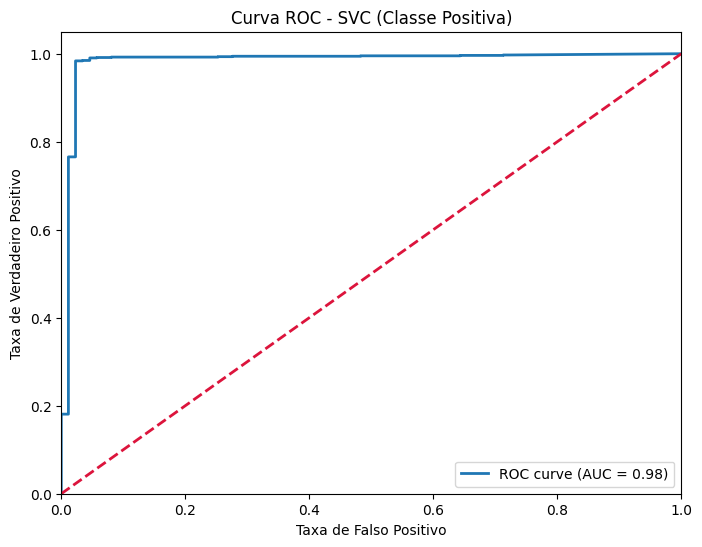

In [ ]:
# Instanciando XGBoost e SVC para base de treino
xgb = XGBClassifier(random_state = 42)
svc = SVC(kernel = 'linear', random_state = 42, C = 1.0, probability = True, class_weight = 'balanced')
xgb.fit(x_treino_pca, y_treino_s)
svc.fit(x_treino_pca, y_treino_s)

# Lista de modelos para execução da função avaliar_mods
modelos_ml = {
    'XGBoost': xgb,
    'SVC': svc
}

# Avaliar desempenho das bases individualmente
avaliar_mods(modelos_ml, x_teste_pca, y_teste)

### Modelo XGBoost: Desempenho inicial da base de teste pós-treinamento
<p>A fase de teste nos mostrou um retorno de 98% de acurácia, obtendo 100%, 98% e 99% nas métricas na classe de pacientes com diagnóstico Positivo, indicando boa generalização desta classificação, assim como também exposto na curva <b>ROC-AUC</b>, onde o modelo é perfeito para o mesmo cenário, com 100%. Por outro lado, possuímos pacientes com diagnóstico Negativo com 89% do <b>f1-score</b>, com essa média constituída por 83% de precisão e 97% de sensibilidade, uma diferença de 10%  entre as médias harmônicas das classes.</p>

<p>O modelo de teste possui uma quantidade desbalanceada de 1045 casos Positivos e 87 Negativos. Segundo a Matriz de Confusão, os valores dos casos verdadeiros e falsos, positivos e negativos, ressaltam uma situação ótima, mas que também pode ser aprimorada para os casos de pacientes sem diagnóstico, devida à pouca quantidade de amostras da classe e quantidade de erros. Estas gafes do algoritmo podem causar tratamentos indevidos ou a falta deles em situações necessárias e assim causar danos ao paciente, caso não apurado com mais cautela pelos profissionais da saúde. Para a fase inicial de testes, o resultado ainda assim é excelente.</p>

___
### Modelo SVC: Desempenho inicial da base de teste pós-treinamento
<p>Na fase de teste do algoritmo em questão, percebemos uma mesma acurácia vista no modelo anterior, porém com a curva <b>ROC-AUC</b> também exibindo 98% de sua área preenchida para casos positivos. Iniciando atrás de <b><em>XGBoost</em></b>, apesar de pontualmente superando valores de sensibilidade totalizando 98% para Negativo, o algoritmo peca nos valores de precisão na classe, com 77%, indicando desempenho menor em classificar casos negativos reais, baixando o <b>f1-score</b> desta classificação para 86%.</p>

<p>A Matriz novamente nos revela os valores de cada previsão correta e incorreta, com bom desempenho no acerto dos valores Negativos, apesar das porcentagens mais baixas nas métricas e 26 erros da classe com o diagnóstico, nos evidenciando a importância e necessidade de melhor calibrar do modelo.</p>

## Melhorando Desempenho dos Modelos
<p>Para tais problemas observados e potenciais riscos, visando melhora da
qualidade e do desempenho dos acertos das classes, evitando falsos
positivos e negativos, os algoritmos passarão por alterações nos
hiperparâmetros, visando melhora balanceada da classe sem diagnóstico e
diminuição de erros da classe Positiva, validação cruzada através do
<b><em>RandomizedSearchCV</em></b> e novas comparações dos algoritmos
ocorrerão.</p>

In [ ]:
# Validação cruzada com StratifiedKFold
kf = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 42)

# Iniciando Feature Engineering
xgb_params = { 'n_estimators': [200, 400, 600, 800],
               'max_depth': [3, 5, 7, 9],
               'learning_rate': [0.01, 0.05, 0.1, 0.2],
               'subsample': [0.6, 0.8, 1.0],
               'colsample_bytree': [0.6, 0.8, 1.0],
               'gamma': [0, 1, 3, 5],
               'min_child_weight': [1, 3, 5, 7],
               'scale_pos_weight': [1, 5, 10]
           }

svc_params = { 'C': [0.1, 1, 10, 50, 100],
               'kernel': ['linear', 'rbf', 'poly'],
               'gamma': ['scale', 'auto', 0.01, 0.1, 1],
               'class_weight': [None, 'balanced']
               }

### Cross Validation com StratifiedKFold
<p>O <em>StratifiedKFold</em> foi utilizado para realizar separação da base de treino em partes iguais e aleatóriamente selecionadas, porém sem retirar a proporção das classes em cada uma das partes, a fim de manter a avaliação justa e representativa entre classes e melhorar assim a confiabilidade da validação cruzada ao usar  b><em>RandomizedSearchCV</em></b>. A melhor quantidade encontrada no decorrer dos testes foram 7 partições.</p>

___
### Feature Engineering
<p>Os hiperparâmetros mais relevantes foram selecionados para auxiliar na melhoria dos modelos em questão. Cada um especificado abaixo para seus respectivos modelos:</p>

> **Parâmetros XBoost:**
> - *n_estimators*: Estabelece diferentes quantidades de árvores para as combinações;
> - *max_depth*: Altera profundidade das árvores, controlando complexidade do modelo;
> - *learning_rate*: Controla a taxa de aprendizado do modelo, auxilia na melhor generalização;
> - *subsample*: Determina a fração de amostra usada em cada árvore, ajudando a controlar *overfitting*;
> - *colsample_bytree*: Determina a fração de variáveis usada na árvore;
> - *gamma*: Estipula valor mínimo de ganho de informação para que ocorra uma divisão de nó na árvore;
> - *min_child_weight*: Define peso mínimo da soma das instâncias em cada nó, controlando *overfitting*;
> - *scale_pos_weight*: Aplica pesos para dar mais importância à classe minoritária.

>**Parâmetros SVC:**
> - *C*: Regulariza penalização, mantendo ou não a rigidez dos erros;
> - *kernel*: Define como o modelo realiza a separação das classes;
> - *gamma*: Estabelece nível de influência nos pontos de treino para *kernels* não lineares;
> - *class_weight*: Também funciona aplicando peso, dando importância à classe minoritária.


Fitting 7 folds for each of 50 candidates, totalling 350 fits
Melhores parâmetros XGBoost: {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Fitting 7 folds for each of 30 candidates, totalling 210 fits
Melhores parâmetros SVC: {'kernel': 'rbf', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 100}

Resultados Xgboost Alterado Rand - Acurácia: 0.98

Relatório base teste Xgboost Alterado Rand:
              precision    recall  f1-score   support

    Negativa       0.94      0.84      0.88        87
    Positiva       0.99      1.00      0.99      1045

    accuracy                           0.98      1132
   macro avg       0.96      0.92      0.94      1132
weighted avg       0.98      0.98      0.98      1132


Matriz de Confusão:
[[  73   14]
 [   5 1040]]


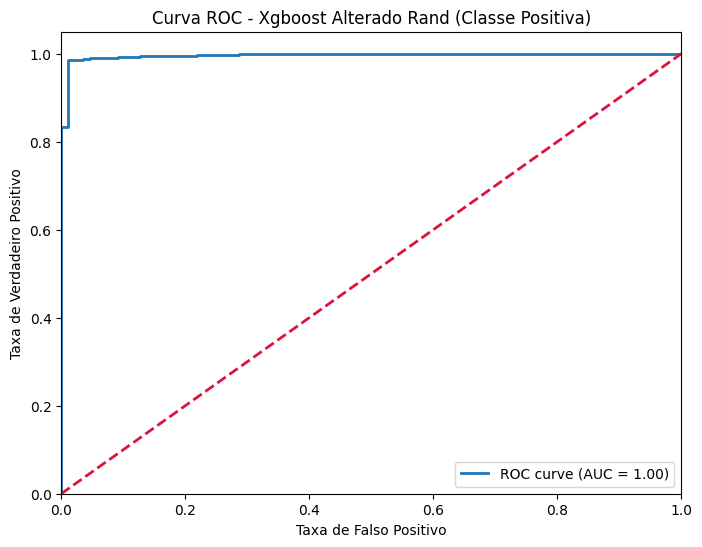


Resultados SVC Alterado Rand - Acurácia: 0.98

Relatório base teste SVC Alterado Rand:
              precision    recall  f1-score   support

    Negativa       0.94      0.74      0.83        87
    Positiva       0.98      1.00      0.99      1045

    accuracy                           0.98      1132
   macro avg       0.96      0.87      0.91      1132
weighted avg       0.98      0.98      0.97      1132


Matriz de Confusão:
[[  64   23]
 [   4 1041]]


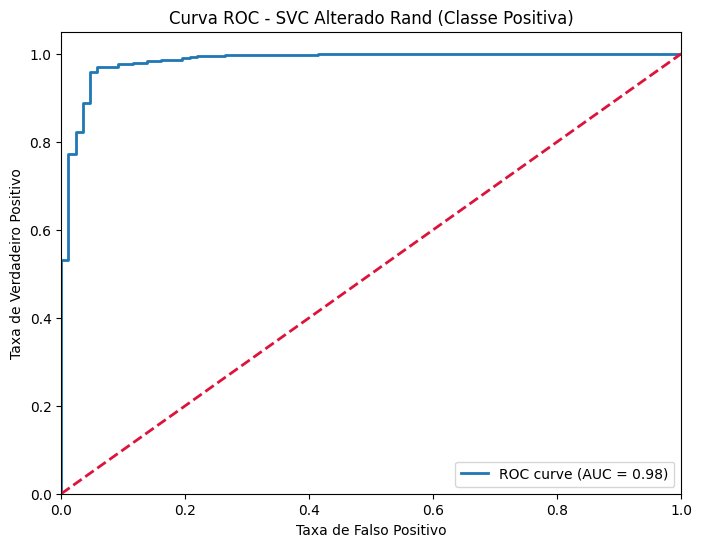

In [ ]:
# Criando outros modelos ML
xgb2 = XGBClassifier(eval_metric = 'logloss', random_state = 42)
svc2 = SVC(probability = True, random_state = 42)

# Utilizando função de execução do RandomizedSearch
bp_xgb, be_xgb = exec_random_search(nome_modelo = 'XGBoost', estimator = xgb2,param_grid = xgb_params, x_train = x_treino_pca,
                                       y_train = y_treino_s, scoring = 'f1_macro', cv = kf, n_iter = 50)

bp_svc, be_svc = exec_random_search(nome_modelo = 'SVC', estimator = svc2, param_grid = svc_params, x_train = x_treino_pca,
                                      y_train = y_treino_s, scoring = 'f1_macro', cv = kf, n_iter = 30)

# Lista 2 de modelos para execução da função avaliar_mods
mod_rand = {
    'Xgboost Alterado Rand': be_xgb,
    'SVC Alterado Rand': be_svc
}

# Avaliando novamente com hiperparâmetros selecionados
avaliar_mods(mod_rand, x_teste_pca, y_teste)

### RandomizedSearchCV
<p>Para esta etapa, foi realizada a implementação de duas instâncias de <b><em>RandomizedSearchCV</em></b>, onde a primeira instância estabelece os melhores valores dos parâmetros disponibilizados e assim é visualizado o resultado de ambos modelos na fase de teste. Para ambos os modelos, inicialmente, o foco de <em>scoring</em> é melhorar <b>f1-score</b> utilizando <b>f1-macro</b>, para que o desempenho de cada classe do modelo seja calculado  separadamente e traga um melhor balanceamento das demais métricas.</p>

___
### Segunda avaliação de desempenho de XGBoost
<p>Imediatamente, percebemos um aumento visível na precisão em 11%, enquanto em sensibilidade houve uma diminuição de 13%, totalizando <b>f1-score</b> em 88% para a classe Negativa, valor levemente menor que a fase inicial. A Matriz de Confusão expõe quase o quíntuplo da quantidade de erros nesta mesma classe, porém, um aumento de 12 acertos na classe Positiva, apesar de manter <b>f1-score</b> em 99% e com mudança de precisão em 98% e sensibilidade em 100%. A curva <b>ROC-AUC</b> novamente nos mostra um desempenho perfeito de 100% para a classe em questão.</p>

<p>Percebe-se que a Acurácia do modelo se manteve em 98% da mesma amneira e não apresentou melhorias consideráveis nos valores percentuais da classe Negativa. A Matriz de Confusão salienta um aumento na dificuldade de classificar estes casos. A fim de melhorar a sensibilidade do algoritmo para esse cenário, o segundo <b><em>RandomizedSearchCV</em></b> utilizará foco do  <em>scoring</em> em <em>recall</em> e será verificado se houve mudanças no desempenho do modelo de maneira positiva.</p>

___
### Segunda avaliação de desempenho de SVC
<p>Tratando-se do modelo <b><em>SVC</em></b>, sua Acurácia, assim como a curva <b>ROC-AUC</b> também se manteve estável em 98%. Houve uma clara mudança no desempenho da classe Negativa, diminuindo a sensibilidade do modelo em 24%, uma queda preocupante, mesmo com um aumento de 17% na precisão, mostrando ainda uma clara sensibilidade com dados desbalanceados. A Matriz de Confusão exibe um aumento de 21 erros na classificação minoritária. Por outro lado, os casos Positivos foram de 26 para apenas 4 erros de classificação, mostrando que o aumento na sensibilidade desta classe foi crucial para os acertos, mesmo que apenas 2%.</p>

<p>Observando o panorama, <b><em>XGBoost</em></b> ainda aparenta fazer melhor generalização dos dados no momento, visto que a performance da classe Negativa teve queda significativa de <b>f1-score</b> para 83%. Para escolher um modelo definitivo, a segunda implementação do <b><em>RandomizedSearchCV</em></b> em <b><em>SVC</em></b> terá foco de <em>scoring</em> novamente em <b>f1-macro</b>, por haver a necessidade de aumento no desempenho e melhor balanceamento na classe 0 em todos os aspectos levantados em análise.</p>

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Melhores parâmetros XGBoost Final: {'subsample': 0.7000000000000001, 'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.16000000000000003}
Fitting 7 folds for each of 10 candidates, totalling 70 fits
Melhores parâmetros SVC Final: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 200}

Limiar escolhido: 0.67 → Precision = 0.998, Recall = 0.986

Limiar escolhido: 0.58 → Precision = 0.989, Recall = 0.989

Relatório com Limiar ajustado (XGBoost Final - Negativa como foco):
Limiar usado: 0.67
              precision    recall  f1-score   support

    Negativa       0.85      0.98      0.91        87
    Positiva       1.00      0.99      0.99      1045

    accuracy                           0.98      1132
   macro avg       0.92      0.98      0.95      1132
weighted avg       0.99      0.98      0.99      1132

Matriz de confusão:
[[  85    2]
 [  15 1030]]
Resultados - Acurácia: 0.98


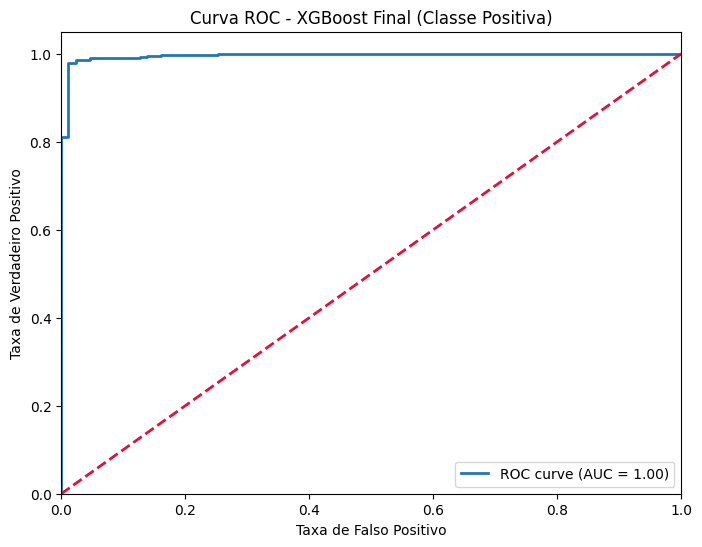


Relatório com Limiar ajustado (SVC Final - Negativa como foco):
Limiar usado: 0.58
              precision    recall  f1-score   support

    Negativa       0.86      0.87      0.87        87
    Positiva       0.99      0.99      0.99      1045

    accuracy                           0.98      1132
   macro avg       0.93      0.93      0.93      1132
weighted avg       0.98      0.98      0.98      1132

Matriz de confusão:
[[  76   11]
 [  12 1033]]
Resultados - Acurácia: 0.98


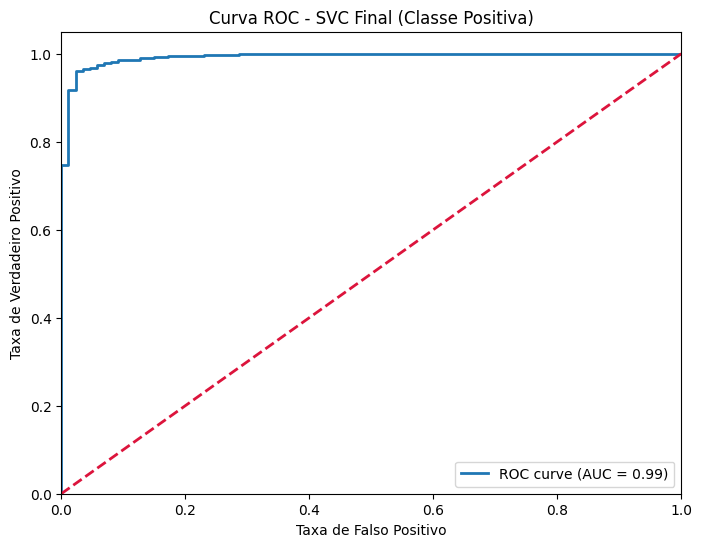

In [ ]:
# Refinando hiperparâmetros com valores próximos dos selecionados
xgb_param_ref = {
    'n_estimators': [bp_xgb['n_estimators']-50, bp_xgb['n_estimators'], bp_xgb['n_estimators']+50],
    'max_depth': [bp_xgb['max_depth']-1, bp_xgb['max_depth'], bp_xgb['max_depth']+1],
    'learning_rate': [bp_xgb['learning_rate']*0.8, bp_xgb['learning_rate'], bp_xgb['learning_rate']*1.2],
    'subsample': [max(0.7, bp_xgb['subsample']-0.1), bp_xgb['subsample'], min(1.0, bp_xgb['subsample']+0.1)]
}

svc_params_ref = { 'C': [bp_svc['C']*0.5, bp_svc['C'], bp_svc['C']*2],
                   'kernel': [bp_svc['kernel']], # mantém o kernel
                   'gamma': [bp_svc['gamma']] if bp_svc['kernel'] == 'linear' else ['scale', 'auto', 0.01, 0.1, 1],
                   'class_weight': [bp_svc['class_weight']]
}

# Segundo Randomized Search com parâmetros refinados
bparam_xgb, best_xgb = exec_random_search(nome_modelo = 'XGBoost Final', estimator = xgb2,param_grid = xgb_param_ref,
                                          x_train = x_treino_pca, y_train = y_treino_s, scoring = 'recall', cv = kf, n_iter = 10)
bparam_svc, best_svc = exec_random_search(nome_modelo = 'SVC Final', estimator = svc2, param_grid = svc_params_ref,
                                           x_train = x_treino_pca, y_train = y_treino_s, scoring = 'f1_macro', cv = kf, n_iter = 10)

# Chama a função para escolher o limiar adequado
y_pred_final_xgb, thr_usado_xgb = escolher_threshold(best_xgb, x_teste_pca, y_teste)
y_pred_final_svc, thr_usado_svc = escolher_threshold(best_svc, x_teste_pca, y_teste)

# Realiza os relatórios finais para XGBoost e SVC
relatorio_threshold(y_teste, y_pred_final_xgb, best_xgb, x_teste_pca,model = 'XGBoost Final',thresh = thr_usado_xgb)
relatorio_threshold(y_teste, y_pred_final_svc, best_svc, x_teste_pca, model = 'SVC Final', thresh = thr_usado_svc)

## Ajustes e Avaliação Final
<p>Para a última etapa, a busca de um limiar ideal será implementada para cada modelo a partir das funções <b><em>ESCOLHER_THRESHOLD</em></b> e <b><em>RELATORIO_THRESHOLD</em></b>. Por fim, foi realizada a segunda implementação do <b><em>RandomizedSearchCV</em></b>, onde os parâmetros serão ajustados buscando valores próximos do que foram escolhidos pela instância anterior, visando refiná-los e buscar melhores resultados, combinados com os melhores limiares a partir dos novos parâmetros. Assim, ambos modelos serão comparados pela última vez.</p>

___
### Resultados
<p>Após uma avaliação cautelosa, chegamos aos seguintes desfechos e decisões.</p>

#### **Avaliação Final Pós-alterações XGBoost**
<p>Com limiares ajustados e hiperparâmetros reestabelecidos, conseguimos um aumento de 2% em <b>f1-score</b>, com 85% e 98% de precisão e sensibilidade, respectivamente, uma melhora e um balanceamento levemente mais consistente para a classe sem diagnósticos. Os erros da classe foram diminuídos para 2, segundo a Matriz de Confusão, uma melhora impressionante nesta classificação.</p>

<p>A Matriz também demonstra um total de 15 falsos Positivos, com 10 erros a mais que o relatório anterior, mas uma quantidade proporcionalmente aceitável. Também é visto que precisão obteve o marco de 100% nesta classe e obteve 99% nas demais métricas, além do mantimento da curva ROC-AUC em 100%, revelando por fim a acurácia de aproximadamente 99% do modelo, um valor bem mais ideal para implementações. </p>

#### **Avaliação Final Pós-alterações SVC**
<p>O modelo final <b><em>SVC</em></b>, por outro lado, mesmo após refatoração dos valores de limiar e hiperparâmetros, não conseguiu superar os valores de <b><em>XGBoost</em></b>. A porcentagem de <b>f1-score</b> se manteve abaixo com 87%, resultado de uma precisão de 86% e sensibilidade de 87% na classe minoritária. A Matriz ainda mostra uma melhora nos acertos em 12 casos, porém a proporção permite concluir que a quantidade de erros desta classe não é ideal.</p>

<p>Enquanto isso, a classe que compõe maioria de amostras se mantém com valor 99% nas métricas, finalizando estacionado com acurácia em 98% e erros na identificação da classe em 12 casos.</p>

___
### Tomada de Decisão Referente ao uso dos Modelos
<p>É chegada à definição de que, por possuír valores melhores e mais balanceados, dentro dos padrões ótimos, dentro de proporções de acertos e erros, que o algoritmo de Aprendizado de Máquina XGBoost é o mais adequado para implementação, por mostrar maior confiabilidade em ambas as classificações da base de dados.</p>

___
### Conclusões
<p>O projeto de Diagnóstico de Doenças da Tireoide demonstrou a importância do uso de técnicas de Aprendizado de Máquina para apoiar decisões médicas, oferecendo maior precisão e rapidez na identificação de pacientes em risco.</p>

<p>Após a análise comparativa de diferentes modelos, o XGBoost se mostrou o mais eficiente, garantindo melhor equilíbrio entre métricas. Para potencializar os resultados, aplicamos redução de dimensionalidade com <b><em>PCA</em></b>, otimizamos hiperparâmetros através da função <b><em>RandomizedSearchCV</em></b> e registramos os melhores parâmetros para futura replicação.</p>

<p>Compreende-se que esse grande leque de artifícios não só aumentaram a confiabilidade do diagnóstico, mas também forneceram uma base sólida para aplicações clínicas e pesquisas futuramente, reforçando o papel deste recurso como aliado dos profissionais da área da saúde.</p>